In [279]:
import json
from datetime import date
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import tqdm

from IPython.display import clear_output

In [280]:
df_fights = pd.read_csv('Fights 2.csv')
df_tour = pd.read_csv('Tournaments 2.csv')

In [281]:
df_fights.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_tour.drop(['Unnamed: 0'], axis = 1, inplace = True)
pass

In [282]:
df_tour.count()

name       625
date       625
type       625
city       625
country    625
state      577
dtype: int64

In [283]:
df_tour.head()

,name,date,type,city,country,state
0,NaN,NaN,NaN,NaN,NaN,NaN
1,UFC Fight Night: Strickland vs. Imavov,2023.1.14,FN,Las Vegas,USA,Nevada
2,UFC Fight Night: Cannonier vs. Strickland,2022.12.17,FN,Las Vegas,USA,Nevada
3,UFC 282: Blachowicz vs. Ankalaev,2022.12.10,NT,Las Vegas,USA,Nevada
4,UFC Fight Night: Thompson vs. Holland,2022.12.03,FN,Orlando,USA,Florida


In [284]:
df_tour.isna().sum()

name        2
date        2
type        2
city        2
country     2
state      50
dtype: int64

In [285]:
df_tour.dtypes

name       object
date       object
type       object
city       object
country    object
state      object
dtype: object

In [286]:
df_tour = df_tour.astype({column: 'string' for column in df_tour.columns})

На самом деле, 25 - значений null по всем признакам кроме state, зная то, что мы обошли 25 страниц, говорят о том, что это полностью пустые строчки. Поэтому уберем их. А те признаки state, где null, заменим на unknown, так как не во всех странах присутствуют state

In [287]:
df_tour = df_tour[df_tour.isna().sum(axis=1)!=6]

In [288]:
df_tour = df_tour[~df_tour.isna()]

In [289]:
df_tour.loc[df_tour['state'].isna(), 'state'] = 'unknown'

In [290]:
df_tour['date'] = pd.to_datetime(df_tour['date'], format = '%Y.%m.%d')

In [291]:
df_tour.to_csv('df_tour_clear.csv')

In [292]:
df_tour_clear = df_tour.copy()

In [293]:
df_tour_clear.isna().sum()

name       0
date       0
type       0
city       0
country    0
state      0
dtype: int64

##  Преобразуем df_fights

In [294]:
df_fights.head()

,tournament,fighters,nicknames,winner,type,bonuses,division,method,round,seconds,time_format,referee,Details,total_stats,sign_strikes,total_stats_per_round,sign_stats_per_round
0,UFC Fight Night: Cannonier vs. Strickland,"['Jared Cannonier', 'Sean Strickland']","['The Killa Gorilla', '']",Jared Cannonier,normal,"{'Jared Cannonier': [], 'Sean Strickland': []}",Middleweight,Decision - Split,5,18300,5,Herb Dean,NaN,"{'knockdown': [0, 0], 'sig_strikes': [141, 152...","{'head': [57, 126], 'head_total': [187, 365], ...","[{'knockdown': [0, 0], 'sig_strikes': [16, 13]...","[{'head': [3, 9], 'head_total': [26, 43], 'bod..."
1,UFC Fight Night: Cannonier vs. Strickland,"['Arman Tsarukyan', 'Damir Ismagulov']","['Ahalkalakets', 'Qazaq']",Arman Tsarukyan,normal,"{'Arman Tsarukyan': [], 'Damir Ismagulov': []}",Lightweight,Decision - Unanimous,3,11100,3,Mark Smith,NaN,"{'knockdown': [0, 0], 'sig_strikes': [34, 36],...","{'head': [14, 18], 'head_total': [57, 60], 'bo...","[{'knockdown': [0, 0], 'sig_strikes': [9, 13],...","[{'head': [2, 7], 'head_total': [14, 18], 'bod..."
2,UFC Fight Night: Cannonier vs. Strickland,"['Amir Albazi', 'Alessandro Costa']","['The Prince', 'Nono']",Amir Albazi,normal,"{'Amir Albazi': [], 'Alessandro Costa': []}",Flyweight,KO/TKO,3,10933,3,Keith Peterson,Punch to Head At Distance,"{'knockdown': [2, 0], 'sig_strikes': [37, 17],...","{'head': [23, 6], 'head_total': [67, 55], 'bod...","[{'knockdown': [0, 0], 'sig_strikes': [9, 11],...","[{'head': [5, 3], 'head_total': [28, 31], 'bod..."
3,UFC Fight Night: Cannonier vs. Strickland,"['Alex Caceres', 'Julian Erosa']","['Bruce Leeroy', 'Juicy J']",Alex Caceres,"{'Alex Caceres': ['perf'], 'Julian Erosa': []}",normal,Featherweight,KO/TKO,1,3784,3,Herb Dean,Kick to Head At Distance,"{'knockdown': [1, 0], 'sig_strikes': [16, 10],...","{'head': [9, 2], 'head_total': [19, 11], 'body...","[{'knockdown': [1, 0], 'sig_strikes': [16, 10]...","[{'head': [9, 2], 'head_total': [19, 11], 'bod..."
4,UFC Fight Night: Cannonier vs. Strickland,"['Drew Dober', 'Bobby Green']","['', 'King']",Drew Dober,"{'Drew Dober': ['fight'], 'Bobby Green': ['fig...",normal,Lightweight,KO/TKO,2,7365,3,Keith Peterson,Punch to Head At Distance,"{'knockdown': [1, 0], 'sig_strikes': [34, 73],...","{'head': [16, 50], 'head_total': [86, 113], 'b...","[{'knockdown': [0, 0], 'sig_strikes': [17, 39]...","[{'head': [5, 27], 'head_total': [50, 71], 'bo..."


Как можно заметить, с 3-й строчки замечается свдиг на одну колонку из-за того, что отсутствует поле bonuses. Проблема в том, что там не отобразилась информация о типе боя, а именно обычный это поединок или за пояс. Если посмотрим, то информация о поединках за титул содержится. Скорее всего, сюда не попали бои, которые также являются обычными, но в них информация структурируется по-другому (можно понять, зайдя на сайт и проверив).

In [295]:
type_belt_mask = df_fights['type'] == 'belt'

In [296]:
df_fights[type_belt_mask].head()

,tournament,fighters,nicknames,winner,type,bonuses,division,method,round,seconds,time_format,referee,Details,total_stats,sign_strikes,total_stats_per_round,sign_stats_per_round
13,UFC 282: Blachowicz vs. Ankalaev,"['Jan Blachowicz', 'Magomed Ankalaev']","['', '']",without,belt,"{'Jan Blachowicz': [], 'Magomed Ankalaev': []}",UFC Light Heavyweight,Decision - Split,5,18300,5,Marc Goddard,NaN,"{'knockdown': [0, 0], 'sig_strikes': [55, 78],...","{'head': [19, 49], 'head_total': [71, 139], 'b...","[{'knockdown': [0, 0], 'sig_strikes': [14, 19]...","[{'head': [3, 10], 'head_total': [20, 28], 'bo..."
50,UFC 281: Adesanya vs. Pereira,"['Israel Adesanya', 'Alex Pereira']","['The Last Stylebender', 'Poatan']",Alex Pereira,belt,"{'Israel Adesanya': [], 'Alex Pereira': ['perf']}",UFC Middleweight,KO/TKO,5,18121,5,Marc Goddard,Punches to Head At Distance,"{'knockdown': [0, 0], 'sig_strikes': [86, 91],...","{'head': [41, 42], 'head_total': [103, 89], 'b...","[{'knockdown': [0, 0], 'sig_strikes': [23, 23]...","[{'head': [6, 1], 'head_total': [22, 12], 'bod..."
51,UFC 281: Adesanya vs. Pereira,"['Carla Esparza', 'Zhang Weili']","['Cookie Monster', 'Magnum']",Zhang Weili,belt,"{'Carla Esparza': [], 'Zhang Weili': ['perf']}",UFC Women's Strawweight,Submission,2,7265,5,Keith Peterson,Rear Naked Choke\r\n From back crucifix,"{'knockdown': [0, 0], 'sig_strikes': [6, 37], ...","{'head': [6, 20], 'head_total': [31, 58], 'bod...","[{'knockdown': [0, 0], 'sig_strikes': [5, 33],...","[{'head': [5, 19], 'head_total': [26, 48], 'bo..."
86,UFC 280: Oliveira vs. Makhachev,"['Charles Oliveira', 'Islam Makhachev']","['Do Bronx', '']",Islam Makhachev,belt,"{'Charles Oliveira': [], 'Islam Makhachev': ['...",UFC Lightweight,Submission,2,7396,5,Jason Herzog,Arm Triangle From Side Control,"{'knockdown': [0, 1], 'sig_strikes': [19, 30],...","{'head': [7, 25], 'head_total': [23, 35], 'bod...","[{'knockdown': [0, 0], 'sig_strikes': [6, 12],...","[{'head': [1, 9], 'head_total': [5, 15], 'body..."
87,UFC 280: Oliveira vs. Makhachev,"['Aljamain Sterling', 'TJ Dillashaw']","['Funk Master', '']",Aljamain Sterling,belt,"{'Aljamain Sterling': [], 'TJ Dillashaw': []}",UFC Bantamweight,KO/TKO,2,7424,5,Marc Goddard,Punches to Head From Back Control,"{'knockdown': [0, 0], 'sig_strikes': [72, 8], ...","{'head': [56, 3], 'head_total': [75, 20], 'bod...","[{'knockdown': [0, 0], 'sig_strikes': [30, 3],...","[{'head': [24, 0], 'head_total': [38, 8], 'bod..."


In [297]:
type_bonuses_mask = df_fights['bonuses'] == 'normal'

In [298]:
df_fights[type_bonuses_mask].head()

,tournament,fighters,nicknames,winner,type,bonuses,division,method,round,seconds,time_format,referee,Details,total_stats,sign_strikes,total_stats_per_round,sign_stats_per_round
3,UFC Fight Night: Cannonier vs. Strickland,"['Alex Caceres', 'Julian Erosa']","['Bruce Leeroy', 'Juicy J']",Alex Caceres,"{'Alex Caceres': ['perf'], 'Julian Erosa': []}",normal,Featherweight,KO/TKO,1,3784,3,Herb Dean,Kick to Head At Distance,"{'knockdown': [1, 0], 'sig_strikes': [16, 10],...","{'head': [9, 2], 'head_total': [19, 11], 'body...","[{'knockdown': [1, 0], 'sig_strikes': [16, 10]...","[{'head': [9, 2], 'head_total': [19, 11], 'bod..."
4,UFC Fight Night: Cannonier vs. Strickland,"['Drew Dober', 'Bobby Green']","['', 'King']",Drew Dober,"{'Drew Dober': ['fight'], 'Bobby Green': ['fig...",normal,Lightweight,KO/TKO,2,7365,3,Keith Peterson,Punch to Head At Distance,"{'knockdown': [1, 0], 'sig_strikes': [34, 73],...","{'head': [16, 50], 'head_total': [86, 113], 'b...","[{'knockdown': [0, 0], 'sig_strikes': [17, 39]...","[{'head': [5, 27], 'head_total': [50, 71], 'bo..."
5,UFC Fight Night: Cannonier vs. Strickland,"['Cody Brundage', 'Michal Oleksiejczuk']","['', 'Hussar']",Michal Oleksiejczuk,"{'Cody Brundage': [], 'Michal Oleksiejczuk': [...",normal,Middleweight,KO/TKO,1,3796,3,Mark Smith,Punch to Head On Ground,"{'knockdown': [0, 0], 'sig_strikes': [0, 15], ...","{'head': [0, 13], 'head_total': [2, 27], 'body...","[{'knockdown': [0, 0], 'sig_strikes': [0, 15],...","[{'head': [0, 13], 'head_total': [2, 27], 'bod..."
15,UFC 282: Blachowicz vs. Ankalaev,"['Santiago Ponzinibbio', 'Alex Morono']","['Argentine Dagger', 'The Great White']",Santiago Ponzinibbio,"{'Santiago Ponzinibbio': ['perf'], 'Alex Moron...",normal,Catch Weight,KO/TKO,3,10949,3,Jason Herzog,Punches to Head At Distance,"{'knockdown': [1, 1], 'sig_strikes': [66, 38],...","{'head': [31, 34], 'head_total': [99, 120], 'b...","[{'knockdown': [0, 1], 'sig_strikes': [22, 17]...","[{'head': [6, 14], 'head_total': [19, 51], 'bo..."
16,UFC 282: Blachowicz vs. Ankalaev,"['Darren Till', 'Dricus Du Plessis']","['The Gorilla', 'Stillknocks']",Dricus Du Plessis,"{'Darren Till': ['fight'], 'Dricus Du Plessis'...",normal,Middleweight,Submission,3,10963,3,Mark Smith,Neck Crank From Back Control,"{'knockdown': [0, 0], 'sig_strikes': [35, 86],...","{'head': [26, 69], 'head_total': [57, 123], 'b...","[{'knockdown': [0, 0], 'sig_strikes': [6, 60],...","[{'head': [5, 54], 'head_total': [11, 77], 'bo..."


In [299]:
df_fights.count()

tournament               6858
fighters                 6858
nicknames                6858
winner                   6858
type                     6858
bonuses                  6858
division                 6855
method                   6858
round                    6858
seconds                  6858
time_format              6858
referee                  6826
Details                  3659
total_stats              6858
sign_strikes             6858
total_stats_per_round    6858
sign_stats_per_round     6858
dtype: int64

In [300]:
null_mask = df_fights.isnull()
null_mask.any()

tournament               False
fighters                 False
nicknames                False
winner                   False
type                     False
bonuses                  False
division                  True
method                   False
round                    False
seconds                  False
time_format              False
referee                   True
Details                   True
total_stats              False
sign_strikes             False
total_stats_per_round    False
sign_stats_per_round     False
dtype: bool

In [301]:
features_null = ['time_format', 'referee', 'Details', 'sign_stats_per_round']

На самом деле теперь нам предстоит сместить строки где стоят значения NaN в столбце 'sign_stats_per_round' на одну вправо

In [302]:
def swap_places_columns_values(df, column1, column2):
    temp = df[column1].copy()
    df[column1] = df[column2]
    df[column2] = temp
    return df

In [303]:
sign_stats_mask = df_fights['sign_stats_per_round'].isnull()

In [26]:
sp_index = list(df_fights.columns).index('type')
n_columns =  df_fights.columns.shape[0]

In [27]:
# df_fights_offset = df_fights.copy()
# swapped_pairs = [[df_fights.columns[i], df_fights.columns[i-1]] for i in range(n_columns -1, sp_index, -1)]
# swapped_pairs

[['sign_stats_per_round', 'total_stats_per_round'],
 ['total_stats_per_round', 'sign_strikes'],
 ['sign_strikes', 'total_stats'],
 ['total_stats', 'Details'],
 ['Details', 'referee'],
 ['referee', 'time_format'],
 ['time_format', 'seconds'],
 ['seconds', 'round'],
 ['round', 'method'],
 ['method', 'division'],
 ['division', 'bonuses'],
 ['bonuses', 'type']]

In [304]:
# for swapped_features in swapped_pairs:
#     df_fights_offset.loc[sign_stats_mask, swapped_features] = swap_places_columns_values(
#                                                               df_fights_offset[swapped_features][sign_stats_mask], 
#                                                               *swapped_features)


Все прыдедущие преобразования нужны были для другой таблицы, теперь нужно лишь поменить 2 столбца в bonuses и type

In [305]:
swapped_features  = ['bonuses', 'type']
df_fights_offset.loc[type_bonuses_mask, swapped_features] = swap_places_columns_values(df_fights[swapped_features][type_bonuses_mask],
                                                                                      *swapped_features)
df_fights_offset.head()

,tournament,fighters,nicknames,winner,type,bonuses,division,method,round,seconds,time_format,referee,Details,total_stats,sign_strikes,total_stats_per_round,sign_stats_per_round
0,UFC Fight Night: Cannonier vs. Strickland,"['Jared Cannonier', 'Sean Strickland']","['The Killa Gorilla', '']",Jared Cannonier,normal,"{'Jared Cannonier': [], 'Sean Strickland': []}",Middleweight,Decision - Split,5,18300,5,Herb Dean,NaN,"{'knockdown': [0, 0], 'sig_strikes': [141, 152...","{'head': [57, 126], 'head_total': [187, 365], ...","[{'knockdown': [0, 0], 'sig_strikes': [16, 13]...","[{'head': [3, 9], 'head_total': [26, 43], 'bod..."
1,UFC Fight Night: Cannonier vs. Strickland,"['Arman Tsarukyan', 'Damir Ismagulov']","['Ahalkalakets', 'Qazaq']",Arman Tsarukyan,normal,"{'Arman Tsarukyan': [], 'Damir Ismagulov': []}",Lightweight,Decision - Unanimous,3,11100,3,Mark Smith,NaN,"{'knockdown': [0, 0], 'sig_strikes': [34, 36],...","{'head': [14, 18], 'head_total': [57, 60], 'bo...","[{'knockdown': [0, 0], 'sig_strikes': [9, 13],...","[{'head': [2, 7], 'head_total': [14, 18], 'bod..."
2,UFC Fight Night: Cannonier vs. Strickland,"['Amir Albazi', 'Alessandro Costa']","['The Prince', 'Nono']",Amir Albazi,normal,"{'Amir Albazi': [], 'Alessandro Costa': []}",Flyweight,KO/TKO,3,10933,3,Keith Peterson,Punch to Head At Distance,"{'knockdown': [2, 0], 'sig_strikes': [37, 17],...","{'head': [23, 6], 'head_total': [67, 55], 'bod...","[{'knockdown': [0, 0], 'sig_strikes': [9, 11],...","[{'head': [5, 3], 'head_total': [28, 31], 'bod..."
3,UFC Fight Night: Cannonier vs. Strickland,"['Alex Caceres', 'Julian Erosa']","['Bruce Leeroy', 'Juicy J']",Alex Caceres,normal,"{'Alex Caceres': ['perf'], 'Julian Erosa': []}",Featherweight,KO/TKO,1,3784,3,Herb Dean,Kick to Head At Distance,"{'knockdown': [1, 0], 'sig_strikes': [16, 10],...","{'head': [9, 2], 'head_total': [19, 11], 'body...","[{'knockdown': [1, 0], 'sig_strikes': [16, 10]...","[{'head': [9, 2], 'head_total': [19, 11], 'bod..."
4,UFC Fight Night: Cannonier vs. Strickland,"['Drew Dober', 'Bobby Green']","['', 'King']",Drew Dober,normal,"{'Drew Dober': ['fight'], 'Bobby Green': ['fig...",Lightweight,KO/TKO,2,7365,3,Keith Peterson,Punch to Head At Distance,"{'knockdown': [1, 0], 'sig_strikes': [34, 73],...","{'head': [16, 50], 'head_total': [86, 113], 'b...","[{'knockdown': [0, 0], 'sig_strikes': [17, 39]...","[{'head': [5, 27], 'head_total': [50, 71], 'bo..."


In [306]:
df_fights_offset.to_csv('df_fights_offset_2.csv')

In [307]:
df_fights_offset.isnull().sum()

tournament                  0
fighters                    0
nicknames                   0
winner                      0
type                        0
bonuses                     0
division                    3
method                      0
round                       0
seconds                     0
time_format                 0
referee                    32
Details                  3199
total_stats                 0
sign_strikes                0
total_stats_per_round       0
sign_stats_per_round        0
dtype: int64

Теперь мы видим, что осталась только 3 поля со значением null, и при этом восстановлена нужная структура.
Теперь произведем следующие изменения:
1. type - везде где null - заменим на normall
2. referee, Details - unknown

In [308]:
df_fights_clear = df_fights_offset.copy()

In [309]:
df_fights_clear.loc[df_fights_clear['type'].isna(), 'type'] = 'normall'
df_fights_clear.loc[df_fights_clear['referee'].isna(), 'referee'] = 'unknown'
df_fights_clear.loc[df_fights_clear['Details'].isna(), 'Details'] = 'unknown'
df_fights_clear = df_fights_clear.loc[~df_fights_clear['division'].isna()]

In [310]:
df_fights_clear.isnull().sum()

tournament               0
fighters                 0
nicknames                0
winner                   0
type                     0
bonuses                  0
division                 0
method                   0
round                    0
seconds                  0
time_format              0
referee                  0
Details                  0
total_stats              0
sign_strikes             0
total_stats_per_round    0
sign_stats_per_round     0
dtype: int64

In [311]:
string_features = ['tournament', 'type', 'division', 'method', 'referee', 'Details', ]
integer_features = ['round', 'seconds', 'time_format']
arrays_features = ['fighters', 'nicknames']
complex_features = ['total_stats', 'sign_strikes', 'total_stats_per_round', 'sign_stats_per_round']

In [312]:
df_fights_clear = df_fights_clear.astype({feat:int for feat in integer_features})

In [313]:
df_fights_clear = df_fights_clear.astype({str_col: 'string' for str_col in string_features})

In [314]:
df_fights_clear.to_csv('fights_clear_2.csv')

Проблемы с данными исправлены. Теперь можно проанализировать интересные нам статистики.

In [315]:
df_fights_clear.head()

,tournament,fighters,nicknames,winner,type,bonuses,division,method,round,seconds,time_format,referee,Details,total_stats,sign_strikes,total_stats_per_round,sign_stats_per_round
0,UFC Fight Night: Cannonier vs. Strickland,"['Jared Cannonier', 'Sean Strickland']","['The Killa Gorilla', '']",Jared Cannonier,normal,"{'Jared Cannonier': [], 'Sean Strickland': []}",Middleweight,Decision - Split,5,18300,5,Herb Dean,unknown,"{'knockdown': [0, 0], 'sig_strikes': [141, 152...","{'head': [57, 126], 'head_total': [187, 365], ...","[{'knockdown': [0, 0], 'sig_strikes': [16, 13]...","[{'head': [3, 9], 'head_total': [26, 43], 'bod..."
1,UFC Fight Night: Cannonier vs. Strickland,"['Arman Tsarukyan', 'Damir Ismagulov']","['Ahalkalakets', 'Qazaq']",Arman Tsarukyan,normal,"{'Arman Tsarukyan': [], 'Damir Ismagulov': []}",Lightweight,Decision - Unanimous,3,11100,3,Mark Smith,unknown,"{'knockdown': [0, 0], 'sig_strikes': [34, 36],...","{'head': [14, 18], 'head_total': [57, 60], 'bo...","[{'knockdown': [0, 0], 'sig_strikes': [9, 13],...","[{'head': [2, 7], 'head_total': [14, 18], 'bod..."
2,UFC Fight Night: Cannonier vs. Strickland,"['Amir Albazi', 'Alessandro Costa']","['The Prince', 'Nono']",Amir Albazi,normal,"{'Amir Albazi': [], 'Alessandro Costa': []}",Flyweight,KO/TKO,3,10933,3,Keith Peterson,Punch to Head At Distance,"{'knockdown': [2, 0], 'sig_strikes': [37, 17],...","{'head': [23, 6], 'head_total': [67, 55], 'bod...","[{'knockdown': [0, 0], 'sig_strikes': [9, 11],...","[{'head': [5, 3], 'head_total': [28, 31], 'bod..."
3,UFC Fight Night: Cannonier vs. Strickland,"['Alex Caceres', 'Julian Erosa']","['Bruce Leeroy', 'Juicy J']",Alex Caceres,normal,"{'Alex Caceres': ['perf'], 'Julian Erosa': []}",Featherweight,KO/TKO,1,3784,3,Herb Dean,Kick to Head At Distance,"{'knockdown': [1, 0], 'sig_strikes': [16, 10],...","{'head': [9, 2], 'head_total': [19, 11], 'body...","[{'knockdown': [1, 0], 'sig_strikes': [16, 10]...","[{'head': [9, 2], 'head_total': [19, 11], 'bod..."
4,UFC Fight Night: Cannonier vs. Strickland,"['Drew Dober', 'Bobby Green']","['', 'King']",Drew Dober,normal,"{'Drew Dober': ['fight'], 'Bobby Green': ['fig...",Lightweight,KO/TKO,2,7365,3,Keith Peterson,Punch to Head At Distance,"{'knockdown': [1, 0], 'sig_strikes': [34, 73],...","{'head': [16, 50], 'head_total': [86, 113], 'b...","[{'knockdown': [0, 0], 'sig_strikes': [17, 39]...","[{'head': [5, 27], 'head_total': [50, 71], 'bo..."


In [316]:
divisions = df_fights_clear['division'].unique()
divisions

<StringArray>
[                                            'Middleweight',
                                              'Lightweight',
                                                'Flyweight',
                                            'Featherweight',
                                      "Women's Strawweight",
                                             'Welterweight',
                                             'Bantamweight',
                                    'UFC Light Heavyweight',
                                             'Catch Weight',
                                              'Heavyweight',
                                        'Light Heavyweight',
                                        "Women's Flyweight",
                                         'UFC Middleweight',
                                  "UFC Women's Strawweight",
                                     "Women's Bantamweight",
                                          'UFC Lightweight',
          

Давайте для начала отделим женский и мужские девизионы

In [317]:
womens_divisions = ["Women's Flyweight", "Women's Bantamweight", "Women's Featherweight", "Women's Strawweight"]
wd_regex = '|'.join(womens_divisions)
mask_womens_div = df_fights_clear.division.str.contains(wd_regex)
df_fights_clear.loc[mask_womens_div, 'sex'] = 0
df_fights_clear.loc[~mask_womens_div, 'sex'] = 1

Давайте возьмем в рассмотрения турниры после UFC 10, чтобы корректно разделять дивизионы
Выбросим турниры с Open Weight
Изменим названия весовых, где есть наименование UFC
и т.д.

In [318]:
correct_divisions = ['Light Heavyweight'] + list(filter(lambda x: len(x.split(' ')) == 1, divisions))+['Strawweight']

In [319]:
correct_divisions.remove('Heavyweight')

In [320]:
for corr_div in correct_divisions:
    df_fights_clear['division'].replace(f'.*{corr_div}.*', f'{corr_div}', regex = True, inplace = True)

In [321]:
not_lh_mask = df_fights_clear.division != 'Light Heavyweight'
df_fights_clear.loc[not_lh_mask, 'division'] = df_fights_clear.loc[not_lh_mask, 'division']\
.replace('.*Heavyweight.*', 'Heavyweight', regex = True)

In [323]:
df_fights_clear = df_fights_clear.loc[~(df_fights_clear['division'] == 'UFC 10 Tournament')]
df_fights_clear = df_fights_clear.loc[~(df_fights_clear['division'] == 'UFC 8 Tournament')]

In [324]:
df_fights_clear['division'].unique()

<StringArray>
[     'Middleweight',       'Lightweight',         'Flyweight',
     'Featherweight',       'Strawweight',      'Welterweight',
      'Bantamweight', 'Light Heavyweight',      'Catch Weight',
       'Heavyweight',       'Open Weight']
Length: 11, dtype: string

In [325]:
df_fights_clear.to_csv('fights_clear_2.csv')

Давайте, для начала поработает только со всеми данными, кроме complex_features, arrays_features

## simple_features

In [108]:
simple_features = string_features+integer_features

Давайте для начала посмотрим на общие показатели за все время боёв, а именно:
1. Общая за все время
    1. Количество различных методов завершения боёв
    2. Количество различных методов завершения боёв в зависимости от дивизиона
    3. Количество различных методов завершения боёв в зависимости от дивизиона и типа поединка (обычный или титульный)
    4. Количество раундов в боях
    5. Количество раундов в титульных или претендентских боях
2. В динамике

### 1. Количество различных методов завершения боёв

In [326]:
sns.set(rc={'figure.figsize':(18,10)})

<AxesSubplot:xlabel='method', ylabel='Count'>

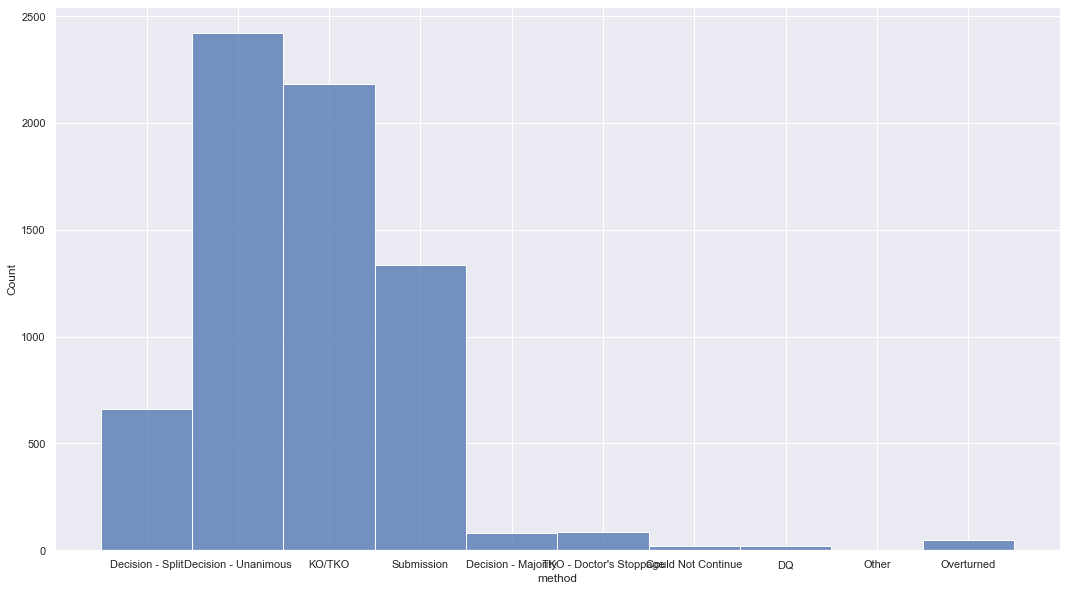

In [327]:
sns.histplot(data = df_fights_clear['method'])

На этой диаграмме можно заметить, что количество нокаутов и технических нокаутов за все время почти такое же как и количество боёв, которые закончились единогласным решением судей, при этом боёв, которые закончились сабмишеном - половина от боёв, где результат - единогласное решение судей. И если объединить KO/TKO и submission, то очевидно, что таких боёв будет гораздо больше. На самом деле это хороший показатель, как мне кажется это очень позитивный показатель, если учитывать следующее утверждение:

Если бой закончился единоглассным решением судей, то он может как привлеч внимание в общем своей зрелещностью, так и быть очень скучным, но если бой завершился досрочно, то он точно, хоть и не на долго, привлечет внимание людей, которые смотрят бои. Потому что досрочные решения интересны подавляющему большенству.

А давайте теперь посмотрим что происходит не в общем по поединкам, а в претендентских или титульных поединках

<AxesSubplot:xlabel='method', ylabel='Count'>

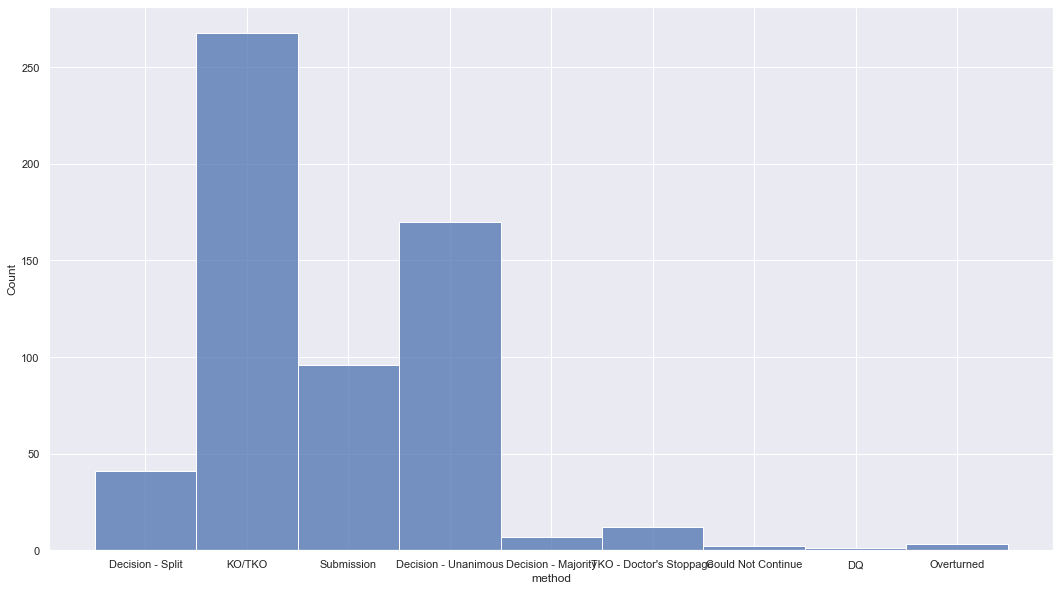

In [328]:
df_challenger_fights = df_fights_clear[df_fights_clear['time_format']==5]
sns.histplot(data = df_challenger_fights['method'])

In [329]:
challenger_methods = df_challenger_fights['method'].value_counts()/df_challenger_fights.shape[0]

In [330]:
challenger_methods

KO/TKO                     0.446667
Decision - Unanimous       0.283333
Submission                     0.16
Decision - Split           0.068333
TKO - Doctor's Stoppage        0.02
Decision - Majority        0.011667
Overturned                    0.005
Could Not Continue         0.003333
DQ                         0.001667
Name: method, dtype: Float64

In [331]:
challenger_methods.sum() - challenger_methods['Decision - Unanimous']

0.7166666666666667

Как мы можем заметить - даже в претендентских поединках чаще около 44% завершаются досрочно нокаутом или техническим нокаутом. При этом около 72% - завершаются либо нокаутом либо единоглассным решением судей. При этом около 71% заканчиваются досрочным решением

### 2. Количество различных методов завершения боёв в зависимости от дивизиона

<AxesSubplot:xlabel='method', ylabel='Count'>

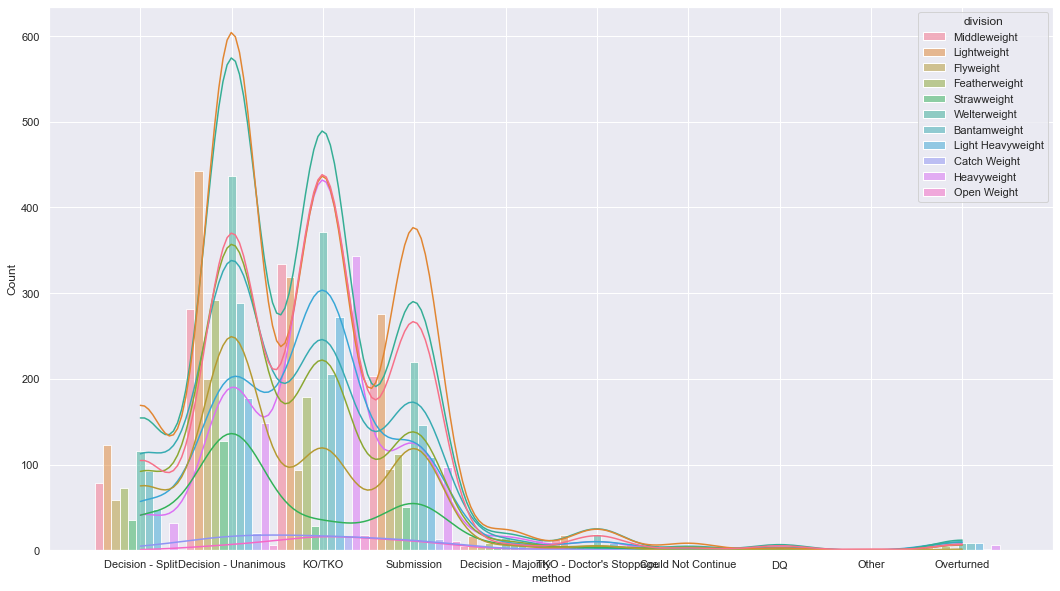

In [332]:
sns.histplot(data = df_fights_clear[['method', 'division']], x = 'method', hue='division', multiple="dodge", kde = True)

Если внимательно посмотреть на пики KDE по различным весовым категориям, то можно легко заметить тот факт, что методы побед распределены очень близко вне зависимости от категорий, исключения лишь составляют: оставшиеся женские весовые категории, и категории "Catch Weight", "Open Weight". Но это, как мне кажется, из-за маленькой выборки.
Но это еще надо бы доказать (:

### 3. Количество различных методов завершения боёв в зависимости от дивизиона и типа поединка (обычный или титульный)

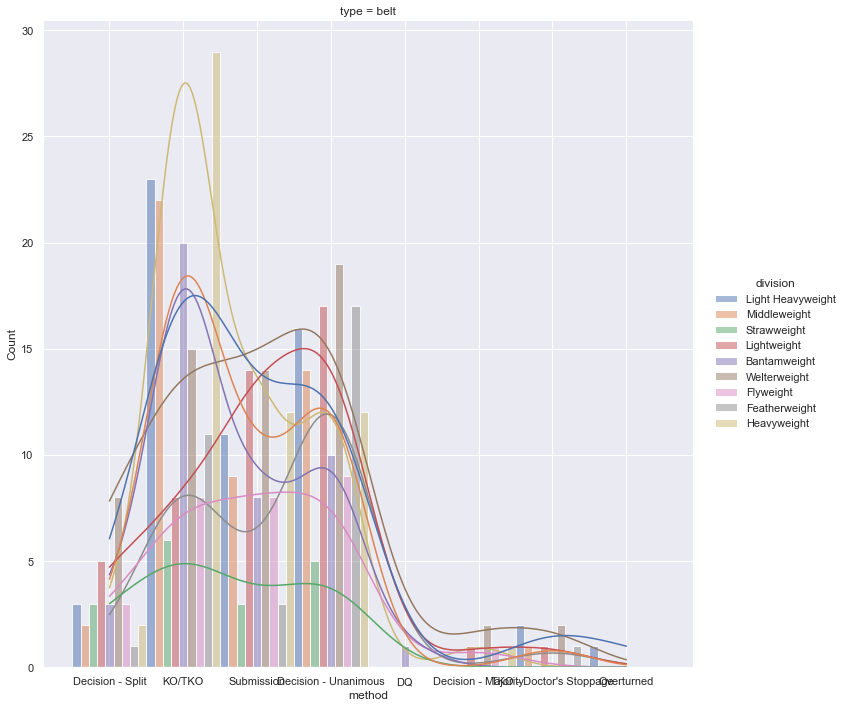

In [440]:
mask_belt_fights = df_fights_clear['type'] == 'belt'
sns.displot(data = df_fights_clear.loc[mask_belt_fights,['method', 'division', 'type']], row = 'type', height = 10,
            x = 'method', hue='division', multiple="dodge", kde = True)

#### Посмотрим на значения частот

In [458]:
'''
    Args:
        df_fights:pd.DataFrame - таблица с поединками, которые содержаться division
    Return:
        df_methods_percents_div:pd.DataFrame-процент различных методов завершения боёв по дивизионам
        df_total_without_decisions:pd.DataFrame-процент исходов турниров по дивизионам, которые не дошли до решения 
'''
def get_frequencies_by_method_over_div(df_fights, mask_belt_fights):
    total = df_fights['method'].shape[0]
    percents = df_fights['method'].value_counts() /total
    print('Total:\n', percents)

    df_methods_percents_div = {}
    df_total_without_decisions = {}

    for division in df_fights['division'].unique():
        mask_division = df_fights['division'] == division 
        mask_method_div = np.logical_and(mask_belt_fights, mask_division)

        total = df_fights.loc[mask_method_div , 'method'].shape[0]
        percents = df_fights.loc[mask_method_div, 'method'].value_counts() /total
        df_methods_percents_div[division] = percents
        if 'Decision - Unanimous' in percents.index and 'Decision - Split' in percents.index:
            df_total_without_decisions[division] = [percents.sum() - percents[['Decision - Unanimous', 'Decision - Split']].sum()]
        
    df_methods_percents_div = pd.DataFrame(df_methods_percents_div)
    df_total_without_decisions = pd.DataFrame(df_total_without_decisions)
    
    return df_methods_percents_div, df_total_without_decisions

In [453]:
df_methods_percents_div, df_total_without_decisions = \
get_frequencies_by_method_over_div(df_fights_clear.loc[mask_belt_fights], mask_belt_fights)

Total:
 KO/TKO                     0.366925
Decision - Unanimous       0.307494
Submission                 0.211886
Decision - Split           0.077519
TKO - Doctor's Stoppage    0.018088
Decision - Majority         0.01292
DQ                         0.002584
Overturned                 0.002584
Name: method, dtype: Float64


In [454]:
df_methods_percents_div

,Light Heavyweight,Middleweight,Strawweight,Lightweight,Bantamweight,Welterweight,Flyweight,Featherweight,Heavyweight
DQ,<NA>,<NA>,<NA>,<NA>,0.02381,<NA>,<NA>,<NA>,<NA>
Decision - Majority,<NA>,<NA>,<NA>,0.021739,<NA>,0.033333,0.034483,<NA>,0.017857
Decision - Split,0.053571,0.041667,0.176471,0.108696,0.071429,0.133333,0.103448,0.030303,0.035714
Decision - Unanimous,0.285714,0.291667,0.294118,0.369565,0.238095,0.316667,0.310345,0.515152,0.214286
KO/TKO,0.410714,0.458333,0.352941,0.173913,0.47619,0.25,0.275862,0.333333,0.517857
Overturned,0.017857,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Submission,0.196429,0.1875,0.176471,0.304348,0.190476,0.233333,0.275862,0.090909,0.214286
TKO - Doctor's Stoppage,0.035714,0.020833,<NA>,0.021739,<NA>,0.033333,<NA>,0.030303,<NA>


In [455]:
df_total_without_decisions.T

,0
Light Heavyweight,0.660714
Middleweight,0.666667
Strawweight,0.529412
Lightweight,0.521739
Bantamweight,0.690476
Welterweight,0.550000
Flyweight,0.586207
Featherweight,0.454545
Heavyweight,0.750000


Интересен тот факт, что 75% титульных боёв в Heaveweight заканчиваются не доходят до решения. Что, на самом деле, является довольно рациональным. Так как все весовые, на самом деле, являются упорядоченными величинами, т.к. вес имеет порядок. То можно рассмотреть предположение - чем выше весовая категория, тем частота завершения титульного турнира решением уменьшается

#### Проверим гипотезу  "чем выше весовая категория, тем частота завершения титульного турнира решением уменьшается"

In [339]:
map_div_order = {"Strawweight": 0,
                     'Flyweight': 1, 'Bantamweight': 2, 'Featherweight': 3, 
                     'Lightweight': 4, 'Welterweight': 5, 'Middleweight': 6,
                     'Heavyweight': 8, 'Light Heavyweight': 7}
map_order_div = {value: key for key, value in map_div_order.items()}

In [340]:
def division_ordering(x):
    x['division'] = map_div_order[x['division']]
    return x

Total:
 KO/TKO                     0.366925
Decision - Unanimous       0.307494
Submission                 0.211886
Decision - Split           0.077519
TKO - Doctor's Stoppage    0.018088
Decision - Majority        0.012920
DQ                         0.002584
Overturned                 0.002584
Name: method, dtype: float64


<AxesSubplot:>

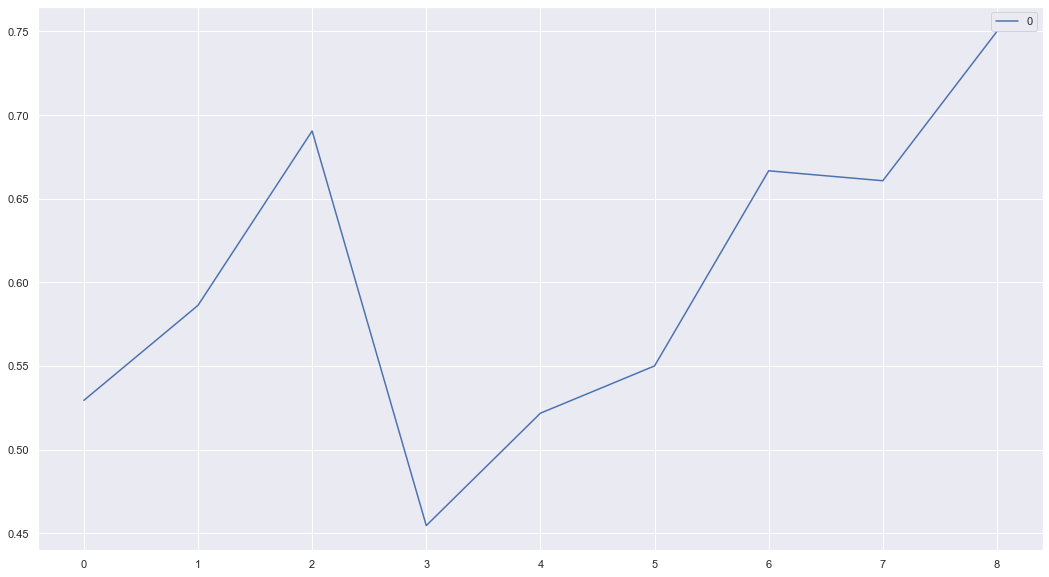

In [438]:
df_fights_div_order = df_fights_clear.loc[~df_fights_clear.division.isin(["Catch Weight", 
                                                                         "Open Weight", 
                                                                         "UFC Women's Strawweight"])]
df_fights_div_order = df_fights_div_order.loc[mask_belt_fights].apply(division_ordering, axis = 1)
mask_belt_fights = df_fights_div_order['type'] == 'belt'

df_methods_percents_div, df_total_without_decisions = \
get_frequencies_by_method_over_div(df_fights_div_order.loc[mask_belt_fights])
sns.lineplot(data = df_total_without_decisions.T)

Как мы видим, после полулегкого веса происходит рост. То есть наша гипотеза может быть верна только для всег весовых начиная с Featherweight division, но нельзя говорить об истинности во всех весовых. Вопрос почему так происходит. Возможно Количество боёв в каждой из катогории так повлияло?

##### Количество боёв в каждой категории (Почему гипотеза не совсем верна для всех дивизионов) 

In [409]:
df_fights_div_order.groupby("division").size()

division
0    17
1    29
2    42
3    33
4    46
5    60
6    48
7    56
8    56
dtype: int64

Как мы видим, нет никаких просадок по количеству боёв, поэтому тут может быть какая-то другая связь. **Подумать почему так может быть**

#### Посмотрим на те же значения только по обычным боям

In [ ]:
mask_normal_fights = 

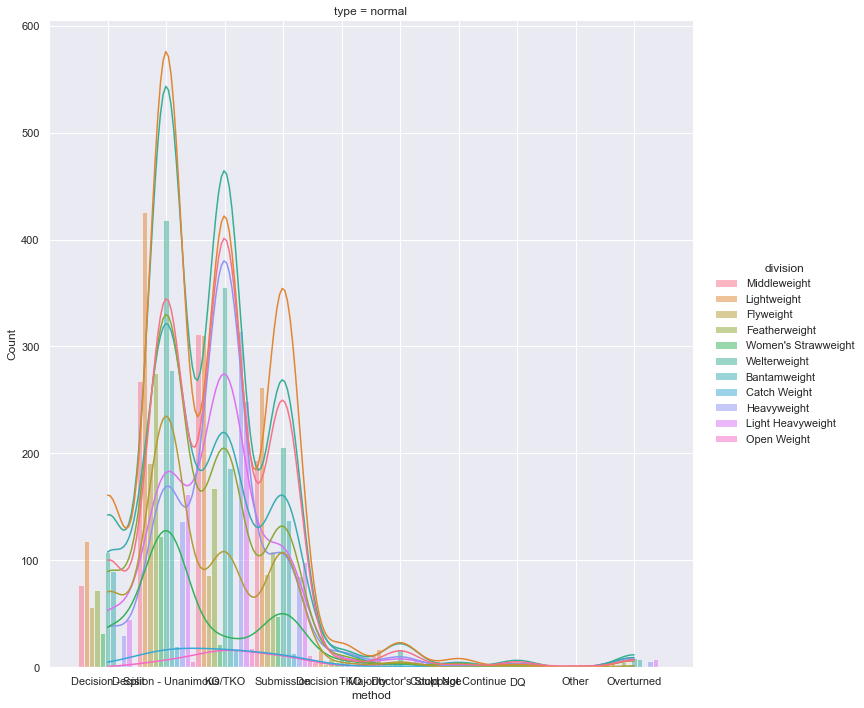

In [135]:
sns.displot(data = df_fights_clear.loc[~mask_belt_fights,['method', 'division', 'type']], row = 'type', height = 10,
            x = 'method', hue='division', multiple="dodge", kde = True)

Как момжно заметить, в обычных боях все поведение сохраняется, но вот уже в титульных боях даже те плотности, которые  в нормальных боях похожи, то в титульных - нет. Например в титульных Lightweight, Featherweight, Flyweight начинают отличаться. На самом деле, можно заметить, что это легкие весовые категории. Можно попробовать выдвинуть следующую гипотезу:
"В титульных боях в более легких весовых категориях за всю историю есть мода в пользу побед единоглассного решения судей"


На самом деле, это можно подкрепить бытовыми рассуждениями, а именно, что чем меньше вес, тем сложнее отправить соперника в нокаут или технический нокаут (а в титульных поединках оказываются достаточно подготовленные бойцы) из-за недостаточности силы и из-за этого они реже завершаются именно нокаутами)

In [459]:
df_methods_percents_div, df_total_without_decisions = \
get_frequencies_by_method_over_div(df_fights_clear.loc[~mask_belt_fights], ~mask_belt_fights)


Total:
 Decision - Unanimous       0.356325
KO/TKO                     0.315342
Submission                 0.193474
Decision - Split           0.097433
TKO - Doctor's Stoppage    0.012063
Decision - Majority        0.011754
Overturned                 0.007423
Could Not Continue         0.003093
DQ                         0.002938
Other                      0.000155
Name: method, dtype: Float64


In [460]:
df_methods_percents_div

,Middleweight,Lightweight,Flyweight,Featherweight,Strawweight,Welterweight,Bantamweight,Catch Weight,Heavyweight,Light Heavyweight,Open Weight
Could Not Continue,0.002273,0.005159,<NA>,0.004658,<NA>,0.001765,0.005587,<NA>,0.001681,0.003448,<NA>
DQ,0.004545,0.00172,<NA>,0.001553,0.004274,0.004413,<NA>,<NA>,0.005042,0.005172,<NA>
Decision - Majority,0.005682,0.013758,0.007009,0.012422,0.021368,0.010591,0.013966,<NA>,0.018487,0.010345,<NA>
Decision - Split,0.0875,0.101462,0.130841,0.111801,0.136752,0.095322,0.125698,0.037037,0.05042,0.077586,<NA>
Decision - Unanimous,0.304545,0.366294,0.446262,0.427019,0.525641,0.368932,0.388268,0.37037,0.230252,0.27931,0.153846
KO/TKO,0.354545,0.267412,0.200935,0.26087,0.094017,0.31421,0.259777,0.314815,0.527731,0.42931,0.461538
Other,0.001136,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Overturned,0.005682,0.004299,0.002336,0.007764,<NA>,0.007944,0.011173,0.018519,0.010084,0.013793,<NA>
Submission,0.220455,0.225279,0.203271,0.169255,0.205128,0.181818,0.192737,0.240741,0.142857,0.168966,0.282051
TKO - Doctor's Stoppage,0.013636,0.014617,0.009346,0.004658,0.012821,0.015004,0.002793,0.018519,0.013445,0.012069,0.102564


In [461]:
df_total_without_decisions.T

,0
Middleweight,0.607955
Lightweight,0.532244
Flyweight,0.422897
Featherweight,0.461180
Strawweight,0.337607
Welterweight,0.535746
Bantamweight,0.486034
Catch Weight,0.592593
Heavyweight,0.719328
Light Heavyweight,0.643103


Total:
 Decision - Unanimous       0.357445
KO/TKO                     0.314452
Submission                 0.192531
Decision - Split           0.098541
Decision - Majority        0.011925
TKO - Doctor's Stoppage    0.011455
Overturned                 0.007375
Could Not Continue         0.003138
DQ                         0.002981
Other                      0.000157
Name: method, dtype: float64


<AxesSubplot:>

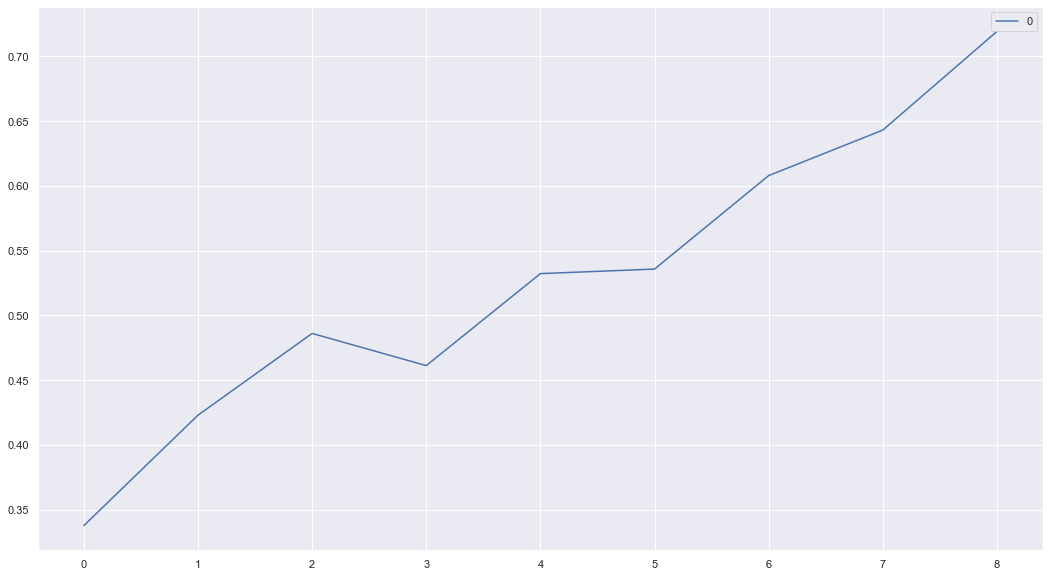

In [463]:
df_fights_div_order = df_fights_clear.loc[~df_fights_clear.division.isin(["Catch Weight", 
                                                                         "Open Weight", 
                                                                         "UFC Women's Strawweight"])]
df_fights_div_order = df_fights_div_order.loc[~mask_belt_fights].apply(division_ordering, axis = 1)
mask_belt_fights_order = ~(df_fights_div_order['type'] == 'belt')

df_methods_percents_div, df_total_without_decisions = \
get_frequencies_by_method_over_div(df_fights_div_order.loc[mask_belt_fights_order], mask_belt_fights_order)
sns.lineplot(data = df_total_without_decisions.T)

А вот это уже больше удовлетворяет нашей гипотезе. В обычных боях с ростом весовой категории происходит рост досрочных побед. При том мы также видим, что в Felterweight  происходит падение, но не на столько больше, на сколько было в титульных поединках

### 4. Количество раундов в боях

<AxesSubplot:xlabel='round', ylabel='Count'>

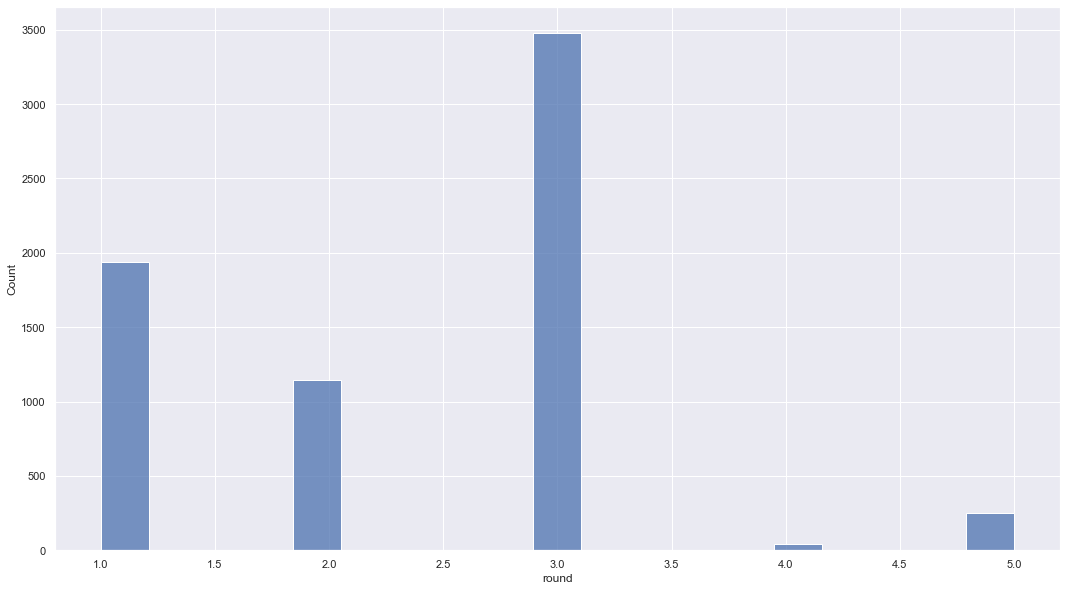

In [116]:
sns.histplot(data = df_fights_clear['round'])

Довольно интересным выглядит тот факт, что боёв, которые продлились 3 раунда значительно больше, чем всех остальных. А боёв, которые продлились только 4-е раунда вообще единицы.
Хотя, на самом деле в этом ничего нет. Ведь в общем бои в MMA - 3 раунда, а тех, которые длятся больше 3 - претендентские, либо бои за титул. Давайте тогда ответим на вопрос о том, как изменится диаграмма, если мы будем учитывать, например только бои такого формата

<AxesSubplot:xlabel='round', ylabel='Count'>

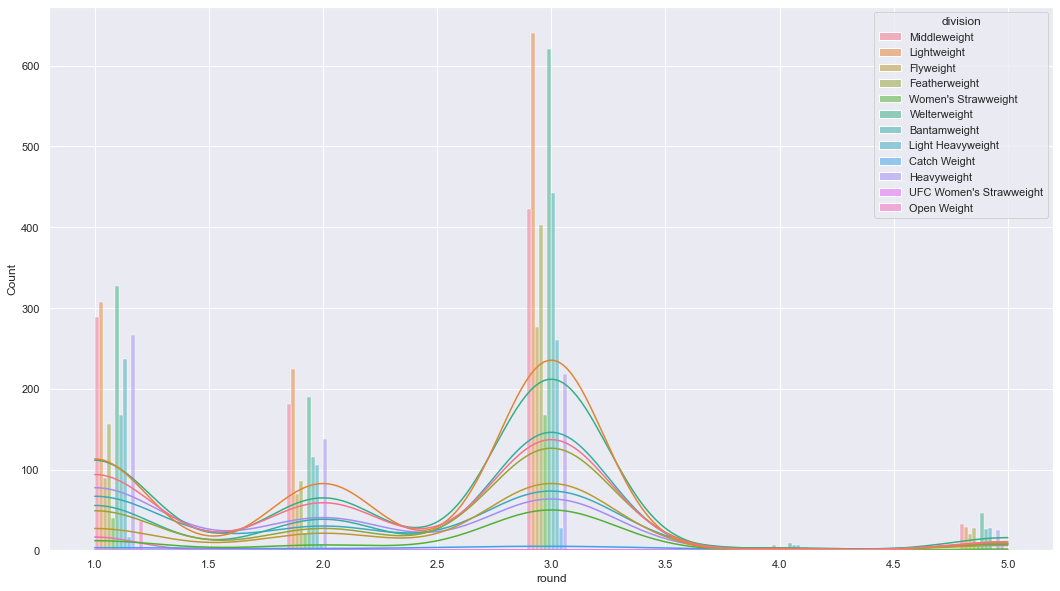

In [117]:
sns.histplot(data = df_fights_clear[['round', 'division']], x = 'round', hue='division', multiple="dodge", kde = True)

Как мы видим, распределение по длительности раундов за весь период в зависимости от категорий также имеют очень похожие распределения с теми же самыми отклонениями, которые обсуждались в предыдущих пунктах

### 5. Количество раундов в титульных или претендентских боях

<AxesSubplot:xlabel='round', ylabel='Count'>

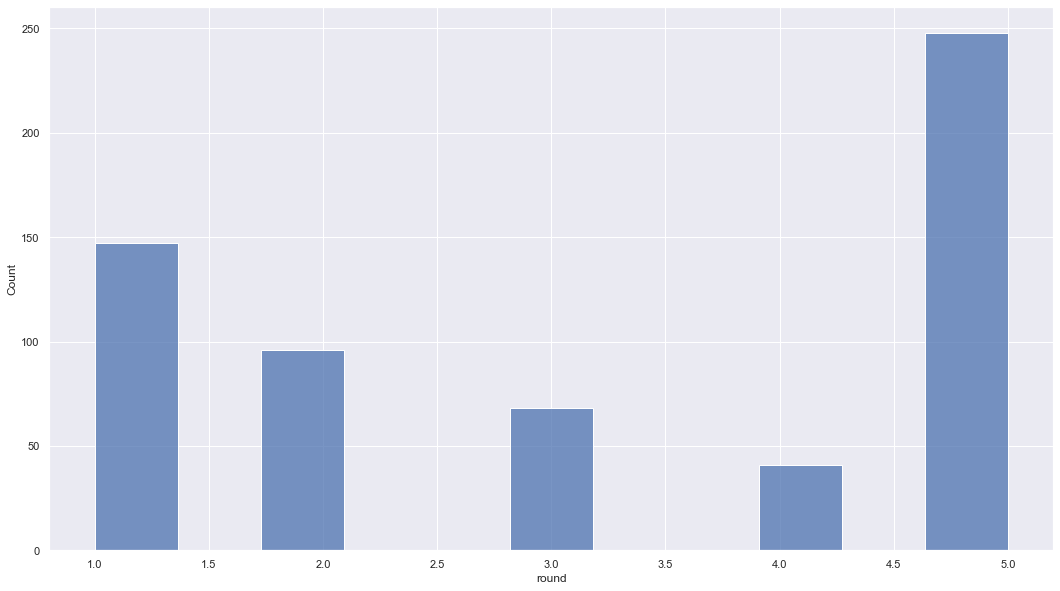

In [462]:
df_challenger_fights = df_fights_clear[df_fights_clear['time_format']==5]
sns.histplot(data = df_challenger_fights['round'])

<AxesSubplot:xlabel='round', ylabel='Count'>

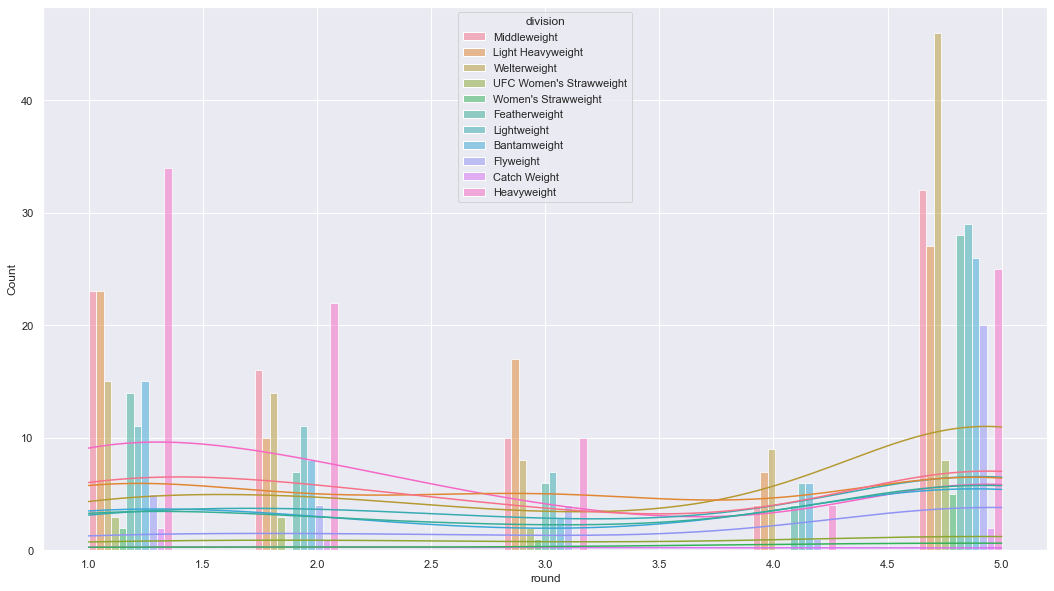

In [118]:
df_challenger_fights = df_fights_clear[df_fights_clear['time_format']==5]
sns.histplot(data = df_challenger_fights[['round', 'division']], x = 'round', hue='division', multiple="dodge", kde = True)

Как мы видим, тут тоже сохраняется похожесть распределений, но уже в меньшей степени.

А вот это уже более интересно. Как можно заметить, если бой претендетский, то количество тех боёв, которые дошли до 5-го раунда  довольно много, давайте посмотрим на процентные соотношения.


In [119]:
df_challenger_fights['round'].value_counts()/df_challenger_fights.shape[0]

5    0.413333
1    0.245000
2    0.160000
3    0.113333
4    0.068333
Name: round, dtype: float64

Как мы видим, около 41% от всех претендентских боёв и боёв за титул доходят до 5-го раунда, но если объеднить 5 и 1, то это говорит о том, что больше 65% претендентских боёв заканчиваются в 1 или 5 раундах.
Давайте теперь отсеим бои, которые были раньше 2001 года и посмотрим на все те же статистики

In [443]:
 def add_date_to_df(df_tour_clear, df_simple):
    df_simple = df_simple.copy()
    for it in df_tour_clear.iloc:
        mask_existing = it['name'] == df_simple['tournament']
        if mask_existing.any().sum():
            df_simple.loc[mask_existing, 'date'] = it['date']
    return df_simple

In [444]:
df_fights_date = add_date_to_df(df_tour_clear, df_fights)

In [445]:
def more_then_date(year, df, column_name = 'date', day = 1, month = 1):
    return df[df[column_name]>datetime.datetime(year, month,day)]

In [446]:
df_fights_2001 = more_then_date(2001, df_fights_date, day = 31, month = 12)

<AxesSubplot:xlabel='round', ylabel='Count'>

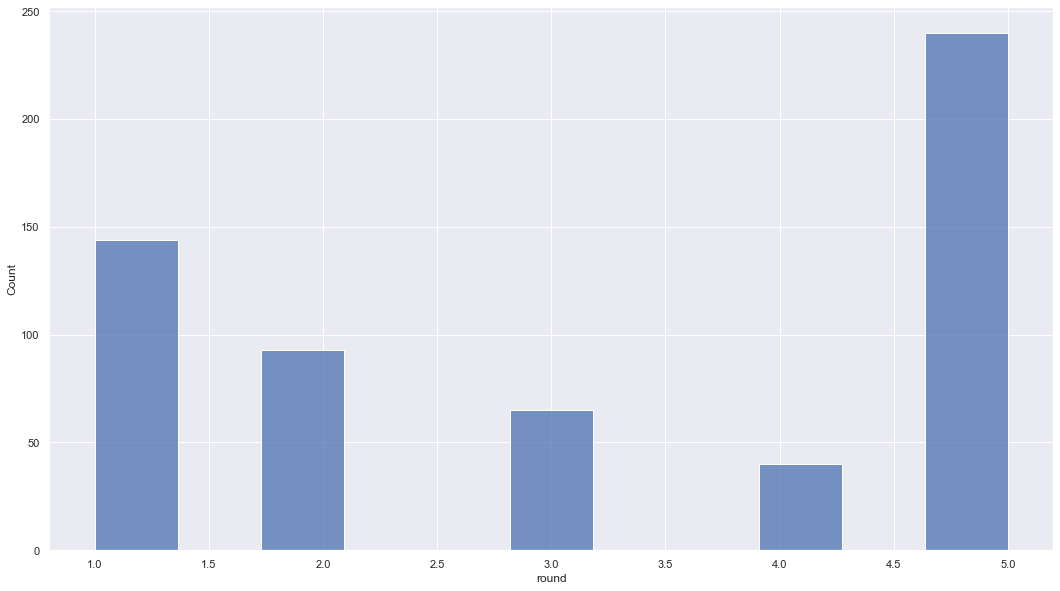

In [447]:
df_challenger_fights = df_fights_2001[df_fights_2001['time_format']==5]
sns.histplot(data = df_challenger_fights['round'])

In [448]:
df_challenger_fights['round'].value_counts()/df_challenger_fights.shape[0]

5    0.412371
1    0.247423
2    0.159794
3    0.111684
4    0.068729
Name: round, dtype: float64

Как мы можем заметить, после 2001 года это все тоже сохранялось. На самом деле если поиграться с годами, то станет заметно, что это свойство сохраняется

### 6. Гистограмма методов завершения боёв

Как мы видили, мы можем найти некоторые интересные взаимосвязи при условии дат. Давайте же теперь оценим эти характеристики в динамике

### В динамике

Интересно посмотреть как изменялись некоторые показатели по мере развития спорта. Давайте посмотрим как распределены некоторые характеристики боёв по годам. А именно:
1. Распределение количества различных method по годам
2. Распределение количества различных Details по годам
3. Среднее время боёв по годам
4. Среднее время боёв в зависимости от method по годам
5. Среднее время боёв в зависимости от devision по годам
6. Среднее время боёв в зависимости от devision и method по годам

In [370]:
df_fights_clear[simple_features].head()

,tournament,type,division,method,referee,Details,round,seconds,time_format
0,UFC Fight Night: Cannonier vs. Strickland,normal,Bout,Decision - Split,Herb Dean,unknown,5,18300,5
1,UFC Fight Night: Cannonier vs. Strickland,normal,Bout,Decision - Unanimous,Mark Smith,unknown,3,11100,3
2,UFC Fight Night: Cannonier vs. Strickland,normal,Bout,KO/TKO,Keith Peterson,Punch to Head At Distance,3,10933,3
3,UFC Fight Night: Cannonier vs. Strickland,normall,Bout,KO/TKO,Herb Dean,Kick to Head At Distance,1,3784,3
4,UFC Fight Night: Cannonier vs. Strickland,normall,Bout,KO/TKO,Keith Peterson,Punch to Head At Distance,2,7365,3


In [301]:
df_simple = df_fights_clear[simple_features].copy()

In [302]:
len(df_tour_clear['name'].unique()), df_simple['tournament'].unique().shape[0]

(620, 581)

In [304]:
df_simple['date'] = None

In [305]:
#join doesn't worked on this case
for it in df_tour_clear.iloc:
    mask_existing = it['name'] == df_simple['tournament']
    if mask_existing.any().sum():
        df_simple.loc[mask_existing, 'date'] = it['date']

In [306]:
df_simple = df_simple.astype({'date':'datetime64'})

In [307]:
ohe_features = {}
categorical_feature = set(simple_features) - set(['round', 'seconds', 'time_format', 'tournament'])
for old_cat in categorical_feature:
    ohe_features[old_cat] = list(old_cat + '_' + df_simple[old_cat].unique())
    

In [308]:
ohe_features

{'type': ['type_normal', 'type_normall', 'type_belt'],
 'Details': ['Details_unknown',
  'Details_Punch to Head At Distance',
  'Details_Kick to Head At Distance',
  'Details_Punch to Head On Ground',
  'Details_Guillotine Choke On Ground',
  'Details_Punches to Head At Distance',
  'Details_Neck Crank From Back Control',
  'Details_Arm Triangle From Side Control',
  'Details_Punches to Head On Ground',
  'Details_Punch to Head In Clinch',
  'Details_to    \r\n      Corner Stoppage',
  'Details_Rear Naked Choke',
  'Details_Punches to Head From Half Guard',
  'Details_Punches to Head From Guard',
  'Details_Knee to Head At Distance',
  'Details_Kick to Head At Distance\r\n      Wheel Kick',
  'Details_Spinning Back Kick Head',
  'Details_Rear Naked Choke\r\n      From back crucifix',
  'Details_Kick to Body At Distance\r\n      Front Kick',
  'Details_Kimura From Side Control',
  "Details_D'Arce Choke On Ground",
  'Details_Elbows to Head From Half Guard',
  'Details_Guillotine Choke I

In [309]:
categorical_feature

{'Details', 'division', 'method', 'referee', 'type'}

In [310]:
df_simple_ohe = pd.get_dummies(df_simple, columns = categorical_feature)

In [311]:
df_simple_ohe.head()

,tournament,round,seconds,time_format,date,type_belt,type_normal,type_normall,Details_Accidental Eye Poke by O'Malley,Details_Accidental Headbutt,...,division_Interim,division_Japan,division_Light,division_Lightweight,division_Middleweight,division_Nations,division_Strawweight,division_Weight,division_Welterweight,division_Women's
0,UFC Fight Night: Cannonier vs. Strickland,5,18300,5,2022-12-17,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,UFC Fight Night: Cannonier vs. Strickland,3,11100,3,2022-12-17,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UFC Fight Night: Cannonier vs. Strickland,3,10933,3,2022-12-17,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,UFC Fight Night: Cannonier vs. Strickland,1,3784,3,2022-12-17,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,UFC Fight Night: Cannonier vs. Strickland,2,7365,3,2022-12-17,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [312]:
def change_date_to_year(x):
    x['year'] = x['date'].year
    return x

In [313]:
df_simple_plotting  = df_simple_ohe.apply(change_date_to_year,axis=1)

In [52]:
df_simple_plotting = df_simple_plotting.groupby('year').mean()

Теперь мы можем посмотреть статистики, которые хотели в начале этой главы

In [625]:
sns.set_theme(style="whitegrid")

In [54]:
df_simple_plotting[ohe_features['method']]

,method_Decision - Split,method_Decision - Unanimous,method_KO/TKO,method_Submission,method_Decision - Majority,method_TKO - Doctor's Stoppage,method_Could Not Continue,method_DQ,method_Other,method_Overturned
year,,,,,,,,,,
1999,0.000000,0.250000,0.500000,0.166667,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000
2000,0.023256,0.325581,0.279070,0.255814,0.046512,0.046512,0.000000,0.023256,0.000000,0.000000
2001,0.000000,0.250000,0.425000,0.225000,0.050000,0.000000,0.000000,0.025000,0.000000,0.025000
2002,0.000000,0.264151,0.490566,0.150943,0.018868,0.056604,0.000000,0.000000,0.000000,0.018868
2003,0.073171,0.268293,0.390244,0.195122,0.000000,0.048780,0.000000,0.024390,0.000000,0.000000
2004,0.051282,0.179487,0.410256,0.282051,0.025641,0.051282,0.000000,0.000000,0.000000,0.000000
2005,0.037500,0.200000,0.400000,0.262500,0.000000,0.087500,0.012500,0.000000,0.000000,0.000000
2006,0.056962,0.259494,0.354430,0.297468,0.012658,0.018987,0.000000,0.000000,0.000000,0.000000
2007,0.046784,0.309942,0.298246,0.315789,0.005848,0.011696,0.005848,0.005848,0.000000,0.000000


<AxesSubplot:xlabel='year'>

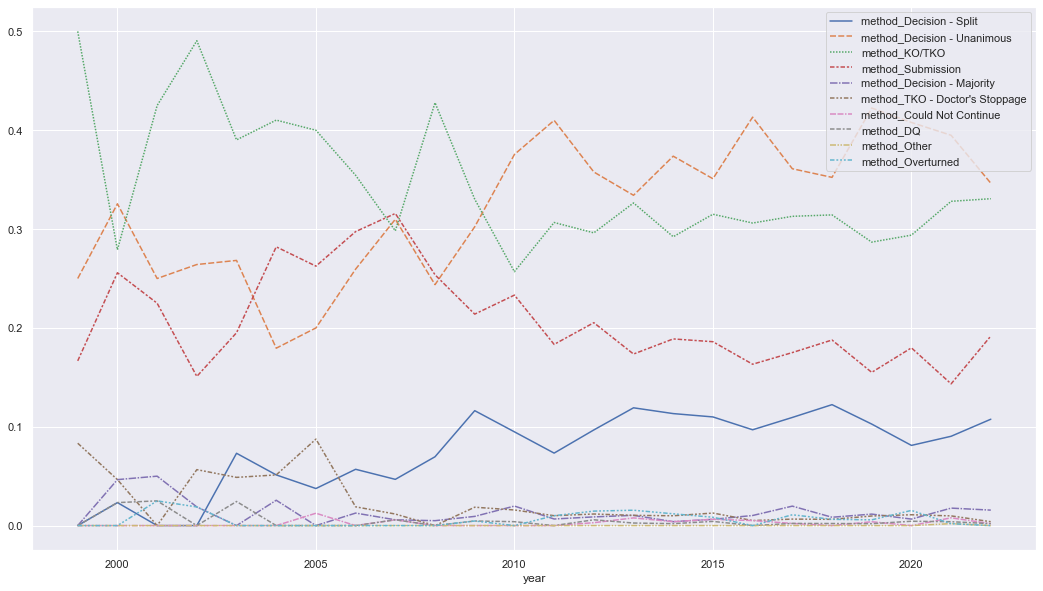

In [55]:
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(data = df_simple_plotting[ohe_features['method']])

<AxesSubplot:xlabel='year'>

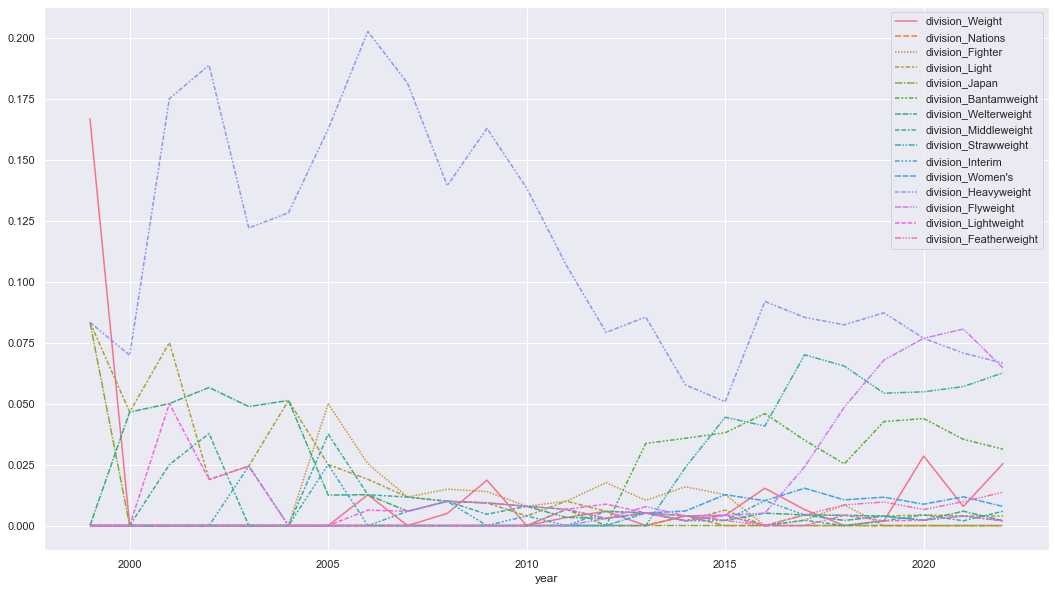

In [56]:
sns.lineplot(data = df_simple_plotting[set(ohe_features['division']) - set(['division_Bout'])])

<AxesSubplot:xlabel='year', ylabel='seconds'>

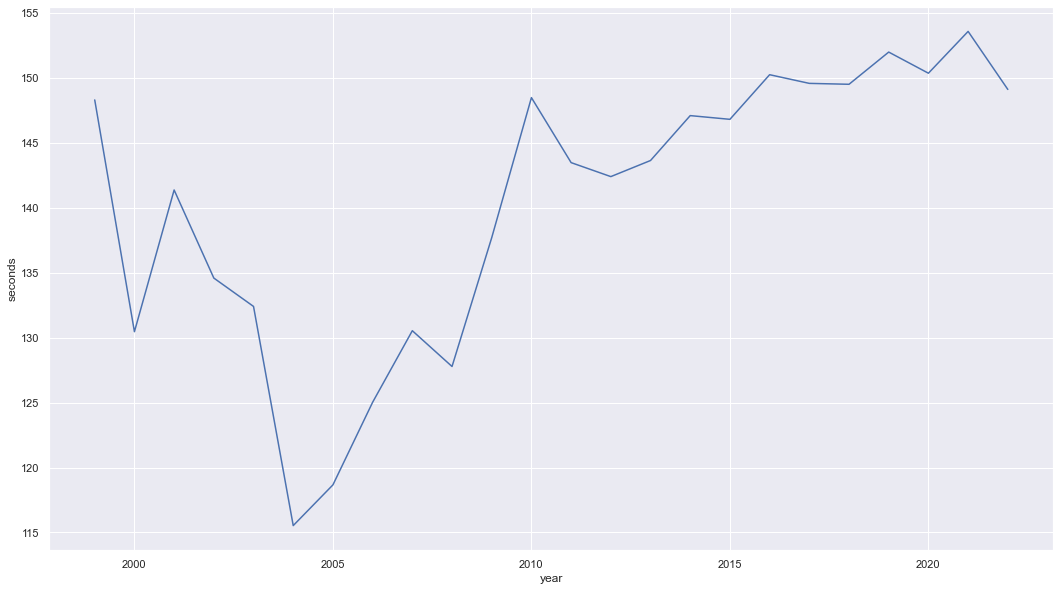

In [57]:
sns.lineplot(data = df_simple_plotting['seconds'] /60)

In [58]:
df_time_plotting = df_simple.apply(change_date_to_year, axis=1)
df_time_plotting = df_time_plotting.groupby(['year', 'division', 'method']).mean() / 60

In [59]:
df_time_plotting

seconds
year division     method                             
1999 Bout         Decision - Unanimous     185.000000
                  KO/TKO                   121.612500
                  Submission                62.133333
                  TKO - Doctor's Stoppage   63.883333
     Heavyweight  Decision - Unanimous     305.000000
...                                               ...
2022 Weight       Submission                63.562500
     Welterweight KO/TKO                   304.066667
     Women's      Decision - Split         305.000000
                  Decision - Unanimous     305.000000
                  Submission               121.083333

[651 rows x 1 columns]

In [60]:
sns.set(rc={'figure.figsize':(15,10)})

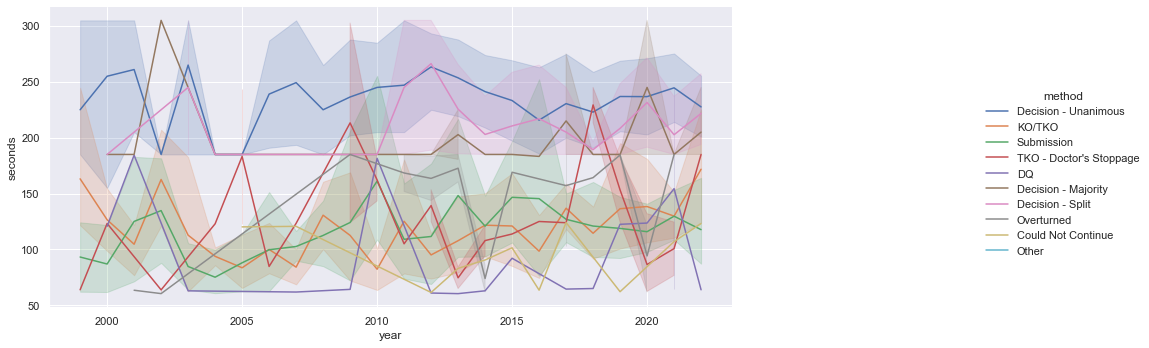

In [61]:
re_sns = sns.relplot(
    data=df_time_plotting, kind="line",
    x="year", y="seconds", hue="method",
)
re_sns.fig.set_size_inches(18,5)

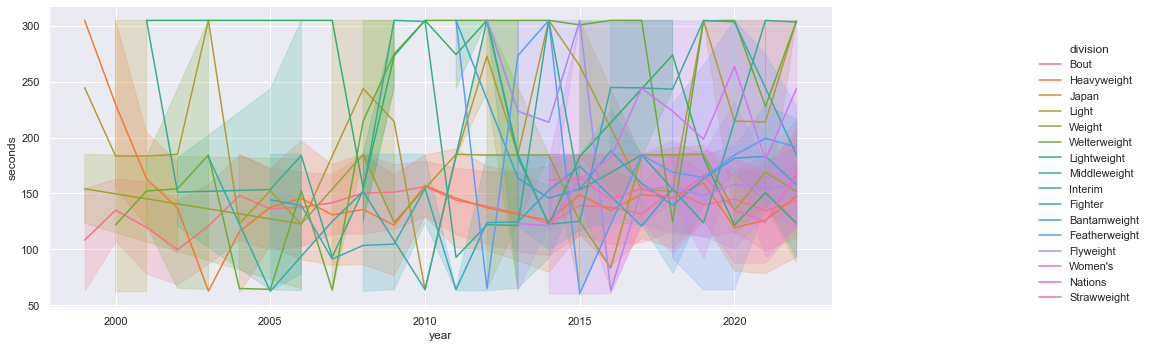

In [62]:
re_sns = sns.relplot(
    data=df_time_plotting, kind = 'line',
    x="year", y="seconds", hue="division",
)
re_sns.fig.set_size_inches(18,5)

## Table per rounds

In [65]:
import json

In [193]:
per_round_features_s = json.loads(df_fights_clear['sign_stats_per_round'][0].replace("\'", "\""))[0]
per_round_features_t = json.loads(df_fights_clear[ 'total_stats_per_round'][0].replace('None','NaN').replace("\'", "\""))[0]

In [194]:
per_round_features  = dict(per_round_features_t,**per_round_features_s)

In [195]:
round_mi = pd.MultiIndex.from_arrays([['fight_id'], [0], ['A']], names = ['fight_id', 'round_id', 'fighter'])

In [196]:
df_per_round = pd.DataFrame([per_round_features, ], index = round_mi)
df_per_round = df_per_round[:0]

In [197]:
df_per_round.columns

Index(['knockdown', 'sig_strikes', 'sig_strikes_total', 'total_strikes',
       'all_total_str', 'takedown', 'takedown_total', 'sub_att', 'rev', 'ctrl',
       'head', 'head_total', 'body', 'body_total', 'leg', 'leg_total',
       'distance', 'distance_total', 'clinch', 'clinch_total', 'ground',
       'ground_total'],
      dtype='object')

In [198]:
t = tqdm.tqdm(total = df_fights_clear['round'].astype(int).sum()*2)
t.clear()
for fi in df_fights_clear.index:
    #so strange transformation because several names have trouble with symbols ', "
    fighters = [fd.strip().replace("'", '').replace('"','') for fd in df_fights_clear.loc[fi, 'fighters'][1:-1].split(',')]#json.loads(df_fights_clear.loc[fi, 'fighters'].replace('\'', '"'))
    
    list_of_rounds_s = json.loads(df_fights_clear.loc[fi, 'sign_stats_per_round'].replace("\'", "\""))
    list_of_rounds_t = json.loads(df_fights_clear.loc[fi, 'total_stats_per_round'].replace('None','[0,0]').replace("\'", "\""))
    
    round_id = 0
    for round_stats_s, round_stats_t in  zip(list_of_rounds_s,list_of_rounds_t):
        for i, fighter in enumerate(fighters):
        #create series with fight_id, round_id, fighter, and stats_per_round
            indeces = pd.MultiIndex.from_tuples([(fi, round_id, fighter)], names = ('fight_id', 'round_id', 'fighter'))
            new_round = {key: array[i] for key, array in round_stats_s.items()}
            
            for key, array in round_stats_t.items():
                new_round[key]= array[i]
            
            new_round = pd.DataFrame(new_round, index = indeces)
            df_per_round = pd.concat([df_per_round, new_round])
            
        round_id += 1
            
    clear_output(True)
    t.update(len(list_of_rounds_s)*2)
        #append series to df_per_round
t.close()

100%|████████████████████████████████████████████████████████████████████████████| 30360/30360 [05:12<00:00, 97.22it/s]


In [199]:
df_per_round.head()

knockdown sig_strikes sig_strikes_total  \
fight_id round_id fighter                                                   
0        0        Jared Cannonier         0          16                43   
                  Sean Strickland         0          13                48   
         1        Jared Cannonier         0          25                58   
                  Sean Strickland         0          28                73   
         2        Jared Cannonier         0          33                69   

                                  total_strikes all_total_str takedown  \
fight_id round_id fighter                                                
0        0        Jared Cannonier            16            43        0   
                  Sean Strickland            17            57        1   
         1        Jared Cannonier            25            58        0   
                  Sean Strickland            28            73        0   
         2        Jared Cannonier            33            69        0   

                                  takedown_total  sub_att rev ctrl  ... body  \
fight_id round_id fighter                                           ...        
0        0        Jared Cannonier              0      0.0   0    0  ...    7   
                  Sean Strickland              1      0.0   0   43  ...    4   
         1        Jared Cannonier              0      0.0   0    0  ...   11   
                  Sean Strickland              0      0.0   0    0  ...    5   
         2        Jared Cannonier              0      0.0   0    0  ...   15   

                                  body_total leg leg_total distance  \
fight_id round_id fighter                                             
0        0        Jared Cannonier          8   6         9       16   
                  Sean Strickland          5   0         0       13   
         1        Jared Cannonier         18   8        12       25   
                  Sean Strickland          8   0         1       28   
         2        Jared Cannonier         21   6         8       33   

                                  distance_total clinch clinch_total ground  \
fight_id round_id fighter                                                     
0        0        Jared Cannonier             43      0            0      0   
                  Sean Strickland             48      0            0      0   
         1        Jared Cannonier             58      0            0      0   
                  Sean Strickland             73      0            0      0   
         2        Jared Cannonier             69      0            0      0   

                                  ground_total  
fight_id round_id fighter                       
0        0        Jared Cannonier            0  
                  Sean Strickland            0  
         1        Jared Cannonier            0  
                  Sean Strickland            0  
         2        Jared Cannonier            0  

[5 rows x 22 columns]

In [200]:
df_per_round.to_csv('s_stats_per_rounds.csv')

## Stats per round analysis

Давайте посмотрим на распределения по различным статистикам по раундам в тех боях.

План.
1. Средняя статистика по боям, которые продлились конкретные 2, 3, 4, 5 раундов
2. Средние значения по боям, которые закончились досрочно при различных methods и в различных division с учетом времени, длительности 
3. Посмотреть на бойцов, статистка у которых значительно отходит от средних  значений 

In [645]:
import matplotlib.pyplot as plt

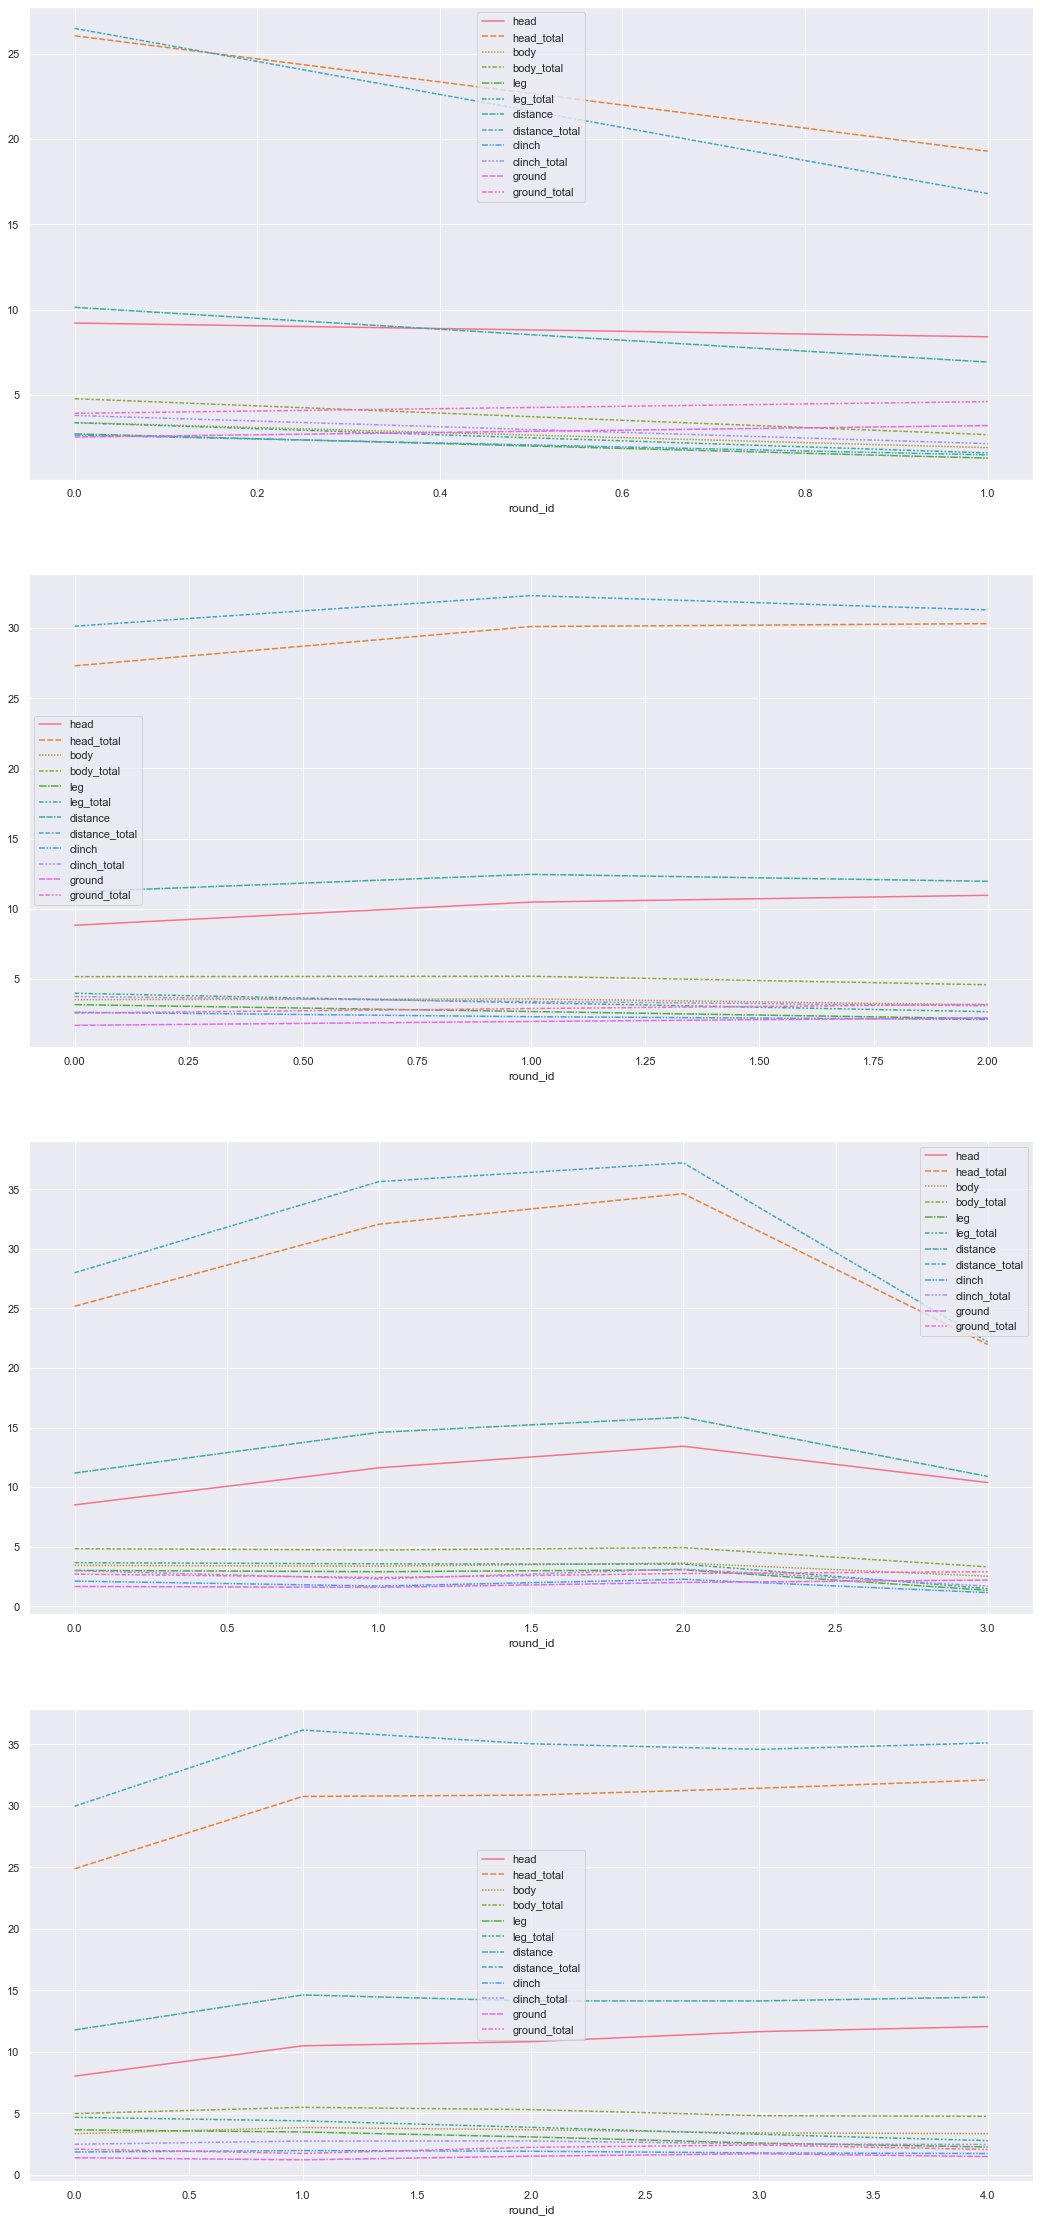

In [649]:
sns.set(rc={'figure.figsize':(18,10*4)})
fig, axs = plt.subplots(nrows=4,)

for max_rounds in range(2, 6):
    five_round_indexes = df_fights_clear[df_fights_clear['round'] == max_rounds].index

    mean_per_five_rounds = df_per_round.loc[five_round_indexes].groupby('round_id').mean()

    sns.lineplot(data = mean_per_five_rounds, ax = axs[max_rounds - 2])


На графике присутствует следующая интересная закономерность. Если бой продлился 4 раунда (Это означает что он завершился досрочно в 4-м раунде), то средняя активность по ударам в голову и ударом на дистанции резко снижается.

## Correlation analysis

Давайте посмотрим на, наверное, одни из самых интересных связей сейчас в нашем случае. А именно, давайте посмотрим а какие есть линейные зависимости между:
1. Различными статистикам бойца на протяжении всей карьеры
2. Любой статистикой одного бойца в зависимости от всех тех, с кем он дрался
3. Победы или поражения бойца в зависимости от средних показателей соперника до боя с выбранным бойцом

Но для начала давайте для каждого бойца в каждом бою (пусть и в каждом раунде) посчитаем сколько различных методов победы было у него до даты боя 

(Дополнить)

In [201]:
df_per_round = pd.read_csv('s_stats_per_rounds.csv', index_col = ['fight_id', 'round_id', 'fighter'])
df_fights = pd.read_csv('fights_clear.csv', index_col = 'Unnamed: 0')
df_tour = pd.read_csv('df_tour_clear.csv', index_col = 'Unnamed: 0')

In [202]:
df_fights = df_fights.astype({feat:'string' for feat in df_fights.\
                                          dtypes[df_fights.dtypes == 'object'].index})

In [203]:
df_tour['date'] = pd.to_datetime(df_tour['date'], format = '%Y-%m-%d')
df_tour = df_tour.astype({'name': 'string', 'type': 'string', 'city': 'string', 'country': 'string', 'state': 'string'})

In [204]:
df_per_round.index.get_level_values('fighter').unique()

Index(['Jared Cannonier', 'Sean Strickland', 'Arman Tsarukyan',
       'Damir Ismagulov', 'Amir Albazi', 'Alessandro Costa', 'Alex Caceres',
       'Julian Erosa', 'Drew Dober', 'Bobby Green',
       ...
       'David Velasquez', 'Scott Adams', 'Katsuhisa Fujii', 'Jason DeLucia',
       'Keiichiro Yamamiya', 'Masutatsu Yano', 'Frank Shamrock',
       'Jason Godsey', 'Brad Kohler', 'Paul Jones'],
      dtype='object', name='fighter', length=2166)

### Получаем методы побед и поражений

Подумать можно ли сделать это все оптималнее, используя табличные операции, join. 
Точно можно использовать apply к expanding, чтобы идти последовательно, но там возникает проблема, что обход идёт по всему MultiIndex

In [205]:
for ti in df_tour.index:
    df_fights.loc[df_fights.tournament == df_tour.loc[ti, 'name'],'date'] = df_tour.loc[ti, 'date']

In [206]:
round_mi = pd.MultiIndex.from_arrays([['fight_id'], ['A']], names = ['fight_id', 'fighter'])
def_prev_stats = pd.DataFrame([], index = round_mi)
def_prev_stats = def_prev_stats[:0]

In [207]:
fighters = df_per_round.index.get_level_values('fighter').unique()
df_rounds_m = df_fights[['winner']].copy()
for fighter in fighters:
    #Выбираем бои где боец победил
    f_win_ids = df_fights.index[df_fights['winner'] == fighter]
    #Выбираем бои где боец проиграл
    chosed_fighter_ids = df_per_round.index.get_level_values('fighter') == fighter
    all_fights_ids_person = df_per_round[chosed_fighter_ids].index.get_level_values('fight_id').unique()
    f_loose_ids = all_fights_ids_person[df_fights.loc[all_fights_ids_person,'winner']!=fighter]
    
    append_df = None
    for ids, t in zip([f_win_ids, f_loose_ids], ['w', 'l']):
        #Выбираем нужные поединки
        fights = df_fights.loc[ids, ['method', 'date']].copy()
        if fights.shape[0]>0:
            fights['fight_id'] = fights.index
            #Меняем индексацию
            fights.set_index('date', inplace = True)
            #Делаем ohe по методам
            fights.sort_index(inplace=True)
            fights = pd.get_dummies(fights, prefix = t,columns = ['method'])
            new_features = list(set(fights.columns) - set(['fight_id']))
            #Делаем cumsum по date
            fights_cs = fights.cumsum()[new_features]
            #Получаем dataframe с fight_id, cumsum of methods
            fights = fights['fight_id']

            fights = pd.concat([fights, fights_cs], axis = 1)
            fights['date'] = fights.index
            for fi in fights.index:
                fights.loc[fi, 'fighter'] = fighter
            fights.set_index(['fight_id', 'fighter'], inplace = True)
            #Добавлям в результирующую таблицу
            def_prev_stats = pd.concat([def_prev_stats, fights])

In [208]:
def_prev_stats = def_prev_stats.fillna(0)

In [209]:
def_prev_stats.head()

,,w_Decision - Split,w_Decision - Unanimous,w_KO/TKO,date,l_Decision - Unanimous,l_KO/TKO,w_Submission,l_Decision - Split,w_TKO - Doctor's Stoppage,l_Overturned,l_Submission,l_Decision - Majority,w_Decision - Majority,l_Other,l_Could Not Continue,l_TKO - Doctor's Stoppage,w_DQ,l_DQ
fight_id,fighter,,,,,,,,,,,,,,,,,,
6138,Jared Cannonier,0.0,0.0,1.0,2016-04-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2098,Jared Cannonier,0.0,0.0,2.0,2017-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5799,Jared Cannonier,0.0,0.0,3.0,2018-11-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5514,Jared Cannonier,0.0,0.0,4.0,2019-05-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,Jared Cannonier,0.0,0.0,5.0,2019-09-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
df_rounds_m = df_per_round.copy()

In [211]:
for ps in def_prev_stats.index:
    ids = df_rounds_m.index[df_rounds_m.index.isin(ps, level = 0)]
    df_rounds_m.loc[ids, def_prev_stats.columns] = def_prev_stats.loc[ps].values

In [212]:
df_rounds_m.to_csv('rounds_with_prev_methids.csv')

In [213]:
cum_sum_pf = df_per_round[np.logical_and(df_per_round.index.isin(prev_fights_fighter, level = 0), chosed_fighter_ids)]\
.groupby('fight_id').mean().cumsum(axis = 0)

NameError: name 'prev_fights_fighter' is not defined

In [215]:
cum_sum_pf.div(np.cumsum(np.arange(start = 1, stop = cum_sum_pf.shape[0]+1)),  axis = 0)

NameError: name 'cum_sum_pf' is not defined

### 1. Корреляция между различными статистикам бойца на протяжении всей карьеры

,knockdown,sig_strikes,sig_strikes_total,total_strikes,all_total_str,takedown,takedown_total,rev,ctrl,head,head_total,body,body_total,leg,leg_total,distance,distance_total,clinch,clinch_total,ground,ground_total,w_Decision - Split,w_Decision - Unanimous,w_KO/TKO,l_Decision - Unanimous,l_KO/TKO,w_Submission,l_Decision - Split,l_Overturned,l_Submission,l_Decision - Majority,l_TKO - Doctor's Stoppage
knockdown,1.000000,0.306333,0.161962,0.185484,0.108969,-0.123598,-0.120292,0.033826,-0.129691,0.388164,0.183616,0.226078,0.188553,-0.162064,-0.165129,0.075253,-0.021838,0.332957,0.339321,0.311995,0.282847,-0.081214,0.087965,0.105183,-0.063587,0.020435,0.265317,-0.130473,0.186960,-0.129030,0.264327,0.223100
sig_strikes,0.306333,1.000000,0.906155,0.866377,0.874206,-0.117139,0.064282,0.089094,0.061176,0.939433,0.873917,0.850267,0.865971,0.249742,0.187438,0.767062,0.645009,0.751985,0.707428,0.438778,0.458491,-0.232808,-0.015452,-0.103987,0.058672,0.088583,0.144067,-0.033047,0.138599,0.055681,0.161043,0.248619
sig_strikes_total,0.161962,0.906155,1.000000,0.762812,0.939402,-0.172626,0.138520,0.025897,-0.100756,0.829696,0.976883,0.725882,0.838182,0.366747,0.355708,0.863100,0.878664,0.614908,0.589916,0.174033,0.203761,-0.201778,-0.022071,-0.091935,-0.073294,0.158129,0.100966,-0.104595,0.170958,0.042031,0.031572,0.085000
total_strikes,0.185484,0.866377,0.762812,1.000000,0.905692,-0.065606,0.174951,0.230695,0.386278,0.849858,0.756127,0.716318,0.710995,0.144674,0.087351,0.534347,0.457025,0.640450,0.601768,0.608956,0.619511,-0.261861,-0.081960,-0.161643,0.116857,0.126734,0.080292,0.105089,0.175264,-0.002079,0.182550,0.187741
all_total_str,0.108969,0.874206,0.939402,0.905692,1.000000,-0.129338,0.210269,0.128306,0.141671,0.824340,0.930707,0.691666,0.780096,0.297776,0.281826,0.734374,0.761995,0.593565,0.567371,0.332913,0.356478,-0.234549,-0.066937,-0.139464,-0.022425,0.179158,0.064461,-0.001211,0.195613,0.002833,0.064561,0.063325
takedown,-0.123598,-0.117139,-0.172626,-0.065606,-0.129338,1.000000,0.534327,-0.197233,0.458044,-0.216588,-0.238378,0.003846,-0.026335,0.109114,0.076123,-0.232392,-0.243878,0.043312,0.053677,0.071726,0.089427,0.056969,-0.336448,-0.136427,0.092959,-0.175594,-0.281566,0.241285,-0.197103,0.066194,-0.094894,-0.161319
takedown_total,-0.120292,0.064282,0.138520,0.174951,0.210269,0.534327,1.000000,-0.087365,0.225766,-0.036575,0.102784,0.095647,0.088392,0.233159,0.262724,-0.026213,0.088204,0.148436,0.126490,0.066395,0.083447,0.003525,-0.104383,0.007839,0.004567,-0.103074,-0.027567,0.348571,-0.197162,0.130495,-0.225800,-0.229375
rev,0.033826,0.089094,0.025897,0.230695,0.128306,-0.197233,-0.087365,1.000000,0.157395,0.203079,0.064598,-0.049878,-0.016001,-0.116113,-0.120473,-0.068796,-0.114160,0.108350,0.168053,0.233036,0.256449,0.171499,-0.047905,0.117343,-0.034179,-0.030206,0.037953,-0.137759,0.260102,-0.099635,0.350175,0.090351
ctrl,-0.129691,0.061176,-0.100756,0.386278,0.141671,0.458044,0.225766,0.157395,1.000000,0.105699,-0.094338,0.045765,-0.023667,-0.116956,-0.165837,-0.259153,-0.317456,0.044497,0.028206,0.542948,0.541426,0.002595,-0.103371,0.007072,0.200655,0.044285,0.021272,0.254218,-0.138343,-0.187678,-0.038734,-0.058966
head,0.388164,0.939433,0.829696,0.849858,0.824340,-0.216588,-0.036575,0.203079,0.105699,1.000000,0.860424,0.709320,0.727679,0.039865,-0.013823,0.665753,0.548158,0.689366,0.658414,0.519602,0.528664,-0.204370,0.009764,-0.021169,0.059334,0.168644,0.205847,-0.066202,0.203643,-0.014555,0.190293,0.223719


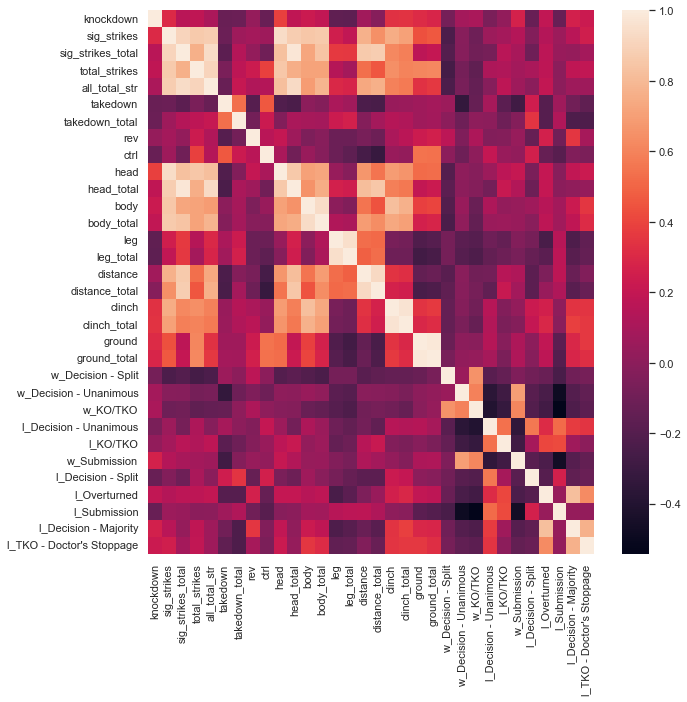

In [235]:
fname = 'Charles Oliveira'
chosed_fighter_ids = df_per_round.index.get_level_values('fighter') == fname
fighter_stats_corr = df_rounds_m[chosed_fighter_ids].corr()

nan_corr = fighter_stats_corr.index[fighter_stats_corr.notna().sum() == 0]
fighter_stats_corr = fighter_stats_corr.drop(nan_corr,)
fighter_stats_corr = fighter_stats_corr.drop(nan_corr, axis = 1)

sns.heatmap(fighter_stats_corr)
fighter_stats_corr.style.background_gradient(cmap='coolwarm')

На самом деле из этой таблицы по Чарльзу  Оливейре мы можем понять некоторые интересные зависимости. Например, мы видим, что есть линейная связь между ударами по телу и ударами в голову? Можно проинтерпретировать эту связь следующим образом:
Боец проводит удары в комбинациях, а не просто пытается попасть по голове или ухудшить функциональные возможности, а пытается проводить комбинации, в которых есть удары как по телу так и по голове, и отсюда мы можем получить хорошую линейную зависимость.
Правда это может быть ложным выводам, потому что статистика по раундам, а не секундным промежуткам скрывает слишком много информации

### 2. Корреляция статистик одного бойца в зависимости от статистик всех тех, с кем он дрался

In [221]:
fname = 'Charles Oliveira'
chosed_fighter_ids = df_rounds_m.index.get_level_values('fighter') == fname
all_fights_ids_person = df_rounds_m[chosed_fighter_ids].index.get_level_values('fight_id').unique()

In [222]:
all_fights_ids_person

Int64Index([  86,  327,  524,  826, 1033, 1381, 1516, 1890, 2208, 2343, 2483,
            2701, 3099, 3197, 3314, 4366, 4406, 4536, 4610, 4648, 4941, 5118,
            5371, 5504, 5675, 5714, 5839, 5984, 6244],
           dtype='int64', name='fight_id')

In [223]:
df_fighter_rounds = df_rounds_m[df_rounds_m.index.isin(all_fights_ids_person, level = 0)].drop('date', axis = 1)

In [224]:
df_fighter_rounds.head()

knockdown  sig_strikes  sig_strikes_total  \
fight_id round_id fighter                                                       
86       0        Charles Oliveira          0            6                 11   
                  Islam Makhachev           0           12                 18   
         1        Charles Oliveira          0           13                 28   
                  Islam Makhachev           1           18                 23   
327      0        Charles Oliveira          1           30                 47   

                                    total_strikes  all_total_str  takedown  \
fight_id round_id fighter                                                    
86       0        Charles Oliveira             10             16         0   
                  Islam Makhachev              51             60         2   
         1        Charles Oliveira             15             30         0   
                  Islam Makhachev              21             26         0   
327      0        Charles Oliveira             33             52         0   

                                    takedown_total  sub_att  rev  ctrl  ...  \
fight_id round_id fighter                                               ...   
86       0        Charles Oliveira               0      0.0    0    38  ...   
                  Islam Makhachev                2      0.0    0   228  ...   
         1        Charles Oliveira               1      0.0    0     4  ...   
                  Islam Makhachev                1      0.0    0    77  ...   
327      0        Charles Oliveira               1      0.0    0    39  ...   

                                    w_TKO - Doctor's Stoppage  l_Overturned  \
fight_id round_id fighter                                                     
86       0        Charles Oliveira                        0.0           0.0   
                  Islam Makhachev                         0.0           0.0   
         1        Charles Oliveira                        0.0           0.0   
                  Islam Makhachev                         0.0           0.0   
327      0        Charles Oliveira                        0.0           0.0   

                                    l_Submission  l_Decision - Majority  \
fight_id round_id fighter                                                 
86       0        Charles Oliveira           0.0                    0.0   
                  Islam Makhachev            0.0                    0.0   
         1        Charles Oliveira           0.0                    0.0   
                  Islam Makhachev            0.0                    0.0   
327      0        Charles Oliveira           2.0                    0.0   

                                    w_Decision - Majority  l_Other  \
fight_id round_id fighter                                            
86       0        Charles Oliveira                    0.0      0.0   
                  Islam Makhachev                     0.0      0.0   
         1        Charles Oliveira                    0.0      0.0   
                  Islam Makhachev                     0.0      0.0   
327      0        Charles Oliveira                    0.0      0.0   

                                    l_Could Not Continue  \
fight_id round_id fighter                                  
86       0        Charles Oliveira                   0.0   
                  Islam Makhachev                    0.0   
         1        Charles Oliveira                   0.0   
                  Islam Makhachev                    0.0   
327      0        Charles Oliveira                   0.0   

                                    l_TKO - Doctor's Stoppage  w_DQ  l_DQ  
fight_id round_id fighter                                                  
86       0        Charles Oliveira                        0.0   0.0   0.0  
                  Islam Makhachev                         0.0   0.0   0.0  
         1        Charles Oliveira                        0.0   0.0   0

Чтобы более удобно воспользоваться методом DataFrame.corr давайте предобразуем наш DataFrame таким образом, что добавим признаки противника в каждом раунде как новые столбцы, в строках, которые соответствуют статистикам по раундам выбранного бойца.


In [225]:
sns.set(rc={'figure.figsize':(10,10)})

<AxesSubplot:>

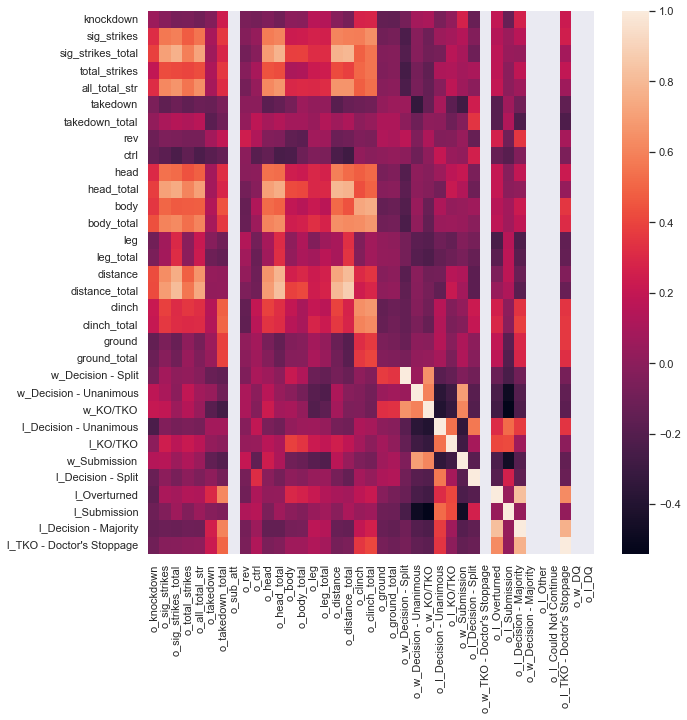

In [228]:
df_chosed_fighter = df_fighter_rounds[df_fighter_rounds.index.isin([fname], level = 2)].copy()

df_opponents_fighter = df_fighter_rounds[~df_fighter_rounds.index.isin([fname], level = 2)].copy()
df_opponents_fighter.rename(columns = {column:'o_' + column for column in df_opponents_fighter.columns}, inplace = True)

#for concatenation by fighter
indeces = [(*mi[:2], fname)for mi in df_opponents_fighter.index.tolist()]
df_opponents_fighter.index = indeces
df_matched_fo = pd.concat([df_chosed_fighter, df_opponents_fighter], axis = 1)

fighter_opponent_corr = df_matched_fo.corr().loc[df_chosed_fighter.columns, df_opponents_fighter.columns]

nan_corr = fighter_opponent_corr.index[fighter_opponent_corr.notna().sum() == 0]
fighter_opponent_corr = fighter_opponent_corr.drop(nan_corr)
sns.heatmap(fighter_opponent_corr)

In [229]:
fighter_opponent_corr

,o_knockdown,o_sig_strikes,o_sig_strikes_total,o_total_strikes,o_all_total_str,o_takedown,o_takedown_total,o_sub_att,o_rev,o_ctrl,...,o_w_TKO - Doctor's Stoppage,o_l_Overturned,o_l_Submission,o_l_Decision - Majority,o_w_Decision - Majority,o_l_Other,o_l_Could Not Continue,o_l_TKO - Doctor's Stoppage,o_w_DQ,o_l_DQ
knockdown,0.058067,-0.014727,-0.067732,-0.066419,-0.094467,-0.034451,0.238462,NaN,-0.065671,-0.080977,...,NaN,0.186960,-0.129030,0.264327,NaN,NaN,NaN,0.223100,NaN,NaN
sig_strikes,0.314983,0.565446,0.588849,0.471472,0.549587,0.101022,0.358014,NaN,-0.028671,0.032163,...,NaN,0.138599,0.055681,0.161043,NaN,NaN,NaN,0.248619,NaN,NaN
sig_strikes_total,0.386728,0.698846,0.765639,0.589743,0.716997,0.068435,0.285564,NaN,-0.087904,-0.016346,...,NaN,0.170958,0.042031,0.031572,NaN,NaN,NaN,0.085000,NaN,NaN
total_strikes,0.187741,0.421980,0.415233,0.399940,0.424329,0.115757,0.361057,NaN,-0.023936,0.096649,...,NaN,0.175264,-0.002079,0.182550,NaN,NaN,NaN,0.187741,NaN,NaN
all_total_str,0.313030,0.615407,0.659867,0.551725,0.642811,0.094118,0.315559,NaN,-0.081423,0.034245,...,NaN,0.195613,0.002833,0.064561,NaN,NaN,NaN,0.063325,NaN,NaN
takedown,-0.060026,-0.162486,-0.110505,-0.156435,-0.118181,-0.130256,-0.065433,NaN,-0.005758,-0.002177,...,NaN,-0.197103,0.066194,-0.094894,NaN,NaN,NaN,-0.161319,NaN,NaN
takedown_total,0.021359,0.102236,0.147879,0.122307,0.161992,-0.180474,-0.101868,NaN,0.028507,0.176165,...,NaN,-0.197162,0.130495,-0.225800,NaN,NaN,NaN,-0.229375,NaN,NaN
rev,-0.112938,-0.049299,-0.058428,-0.073930,-0.077429,0.081480,0.191795,NaN,0.242681,0.126751,...,NaN,0.260102,-0.099635,0.350175,NaN,NaN,NaN,0.090351,NaN,NaN
ctrl,-0.137088,-0.179053,-0.238095,-0.159759,-0.230733,-0.181629,-0.142172,NaN,-0.004051,-0.189641,...,NaN,-0.138343,-0.187678,-0.038734,NaN,NaN,NaN,-0.058966,NaN,NaN
head,0.304191,0.540516,0.521060,0.443851,0.482993,0.083070,0.319760,NaN,-0.010864,0.002213,...,NaN,0.203643,-0.014555,0.190293,NaN,NaN,NaN,0.223719,NaN,NaN


###  3. Победы или поражения бойца в зависимости от средних показателей бойца до боя с выбранным соперником

In [230]:
df_per_round.index.get_level_values('fighter').unique()[20:]

Index(['Bryan Battle', 'Rinat Fakhretdinov', 'David Dvorak', 'Manel Kape',
       'Sergey Morozov', 'Journey Newson', 'Jan Blachowicz',
       'Magomed Ankalaev', 'Paddy Pimblett', 'Jared Gordon',
       ...
       'David Velasquez', 'Scott Adams', 'Katsuhisa Fujii', 'Jason DeLucia',
       'Keiichiro Yamamiya', 'Masutatsu Yano', 'Frank Shamrock',
       'Jason Godsey', 'Brad Kohler', 'Paul Jones'],
      dtype='object', name='fighter', length=2146)

In [231]:
fname = 'Charles Oliveira'
chosed_fighter_ids = df_rounds_m.index.get_level_values('fighter') == fname
all_fights_ids_person = df_rounds_m[chosed_fighter_ids].index.get_level_values('fight_id').unique()
df_fighter_rounds = df_rounds_m[df_per_round.index.isin(all_fights_ids_person, level = 0)].drop('date', axis = 1)

In [232]:
df_chosed_fighter = df_fighter_rounds[df_fighter_rounds.index.isin([fname], level = 2)].copy()

df_opponents_fighter = df_fighter_rounds[~df_fighter_rounds.index.isin([fname], level = 2)].copy()
df_opponents_fighter.rename(columns = {column:'o_' + column for column in df_opponents_fighter.columns}, inplace = True)

#for concatenation by fighter
indeces = [(*mi[:2], fname)for mi in df_opponents_fighter.index.tolist()]
df_opponents_fighter.index = indeces
df_matched_fo = pd.concat([df_chosed_fighter, df_opponents_fighter], axis = 1)

<AxesSubplot:>

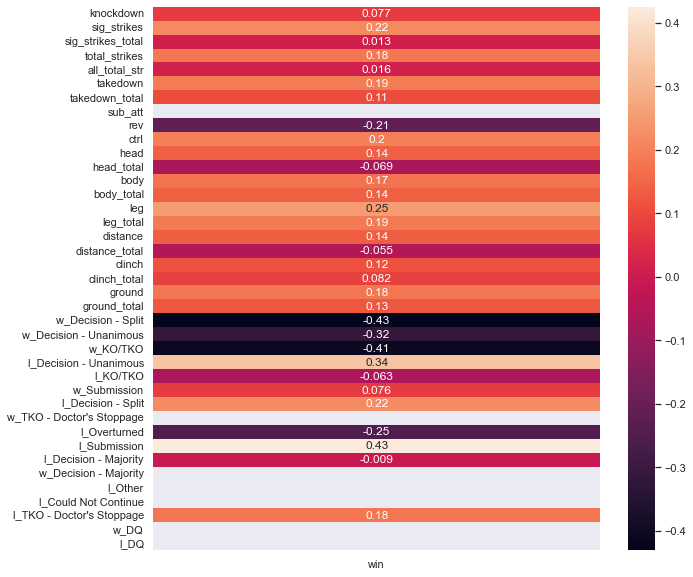

In [233]:
f_win_ids = df_fights_clear.index[df_fights_clear['winner'] == fname]
f_loose_ids = df_matched_fo.index.isin(df_fights_clear.index[df_fights_clear['winner'] != fname], level = 0)

df_matched_fo.loc[f_win_ids, 'win'] = 1
df_matched_fo.loc[f_loose_ids, 'win'] = 0
fighter_opponent_corr = df_matched_fo.corr().loc[df_chosed_fighter.columns,['win']]
sns.heatmap(fighter_opponent_corr, annot=True)

## Предсказания

Давайте попробуем построить модельки, которые будут пытаться:
1. Предсказывать победителя основываясь на статистике предыдущих боев
2. Предсказывать победителя основываясь на статистике предыдущих боев и статистики по каждому раунду
3. Предсказывать метод при помощи которого победит 
4. Предсказывать метод при помощи которого победит, если мы знаем, кто победит